In [2]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
import ujson as uj
sns.set()
sns.set_palette('bright')
from energy_levels import MoleculeLevels
from energy_levels import branching_ratios, calculate_TDMs,calculate_TDM_evecs, calculate_forbidden_TDM_evecs, calculate_forbidden_TDMs
from functools import partial
np.set_printoptions(precision=9, suppress=True)
# from tabulate import tabulate
from matplotlib.collections import LineCollection

In [3]:
%matplotlib inline

In [4]:
X000 = MoleculeLevels.initialize_state('YbOH','174','X000',[0,1,2,3,4,5],M_values = 'none',I=[0,0],S=1/2,round=8,P_values=[1/2])

Cannot construct decoupled basis without M values


In [91]:
X000.write_state(6)

E = 88342.116024 MHz

 1.0 |K=0,N=3,J=2.5,F=2.5,M=0.5> 



In [5]:
X000.evals0/29979.2458

array([0.         , 0.488878425, 0.492938258, 1.467984319, 1.474749118,
       2.937308414, 2.9467758  , 4.896836578, 4.909003214, 7.346549802,
       7.361411403])

In [17]:
np.array([17652.1465,17652.1424,17649.6884]) + np.array([0.488878425,0.492938258,2.9467758])

array([17652.63537842, 17652.63533826, 17652.6351758 ])

In [18]:
np.array([17651.3741,17651.3700,17648.9158]) + np.array([0.488878425,0.492938258,2.9467758])

array([17651.86297843, 17651.86293826, 17651.8625758 ])

In [19]:
np.array([17651.4165,17651.4096,17647.9756]) + np.array([1.467984319, 1.474749118,4.909003214])

array([17652.88448432, 17652.88434912, 17652.88460321])

In [20]:
np.array([17651.8464,17650.3787,1750.3719]) + np.array([0, 1.467984319, 1.474749118])

array([17651.8464    , 17651.84668432,  1751.84664912])

In [22]:
np.array([17652.6782,17652.6716]) + np.array([1.467984319, 1.474749118])

array([17654.14618432, 17654.14634912])

In [24]:
np.array([17650.9630,17650.9588]) + np.array([0.488878425, 0.492938258])

array([17651.45187842, 17651.45173826])

In [64]:
(17651.8466-17651.8629)*29979.2458

-488.6617065195833

In [65]:
(17652.6182-17652.6354)*29979.2458

-515.6430277123609

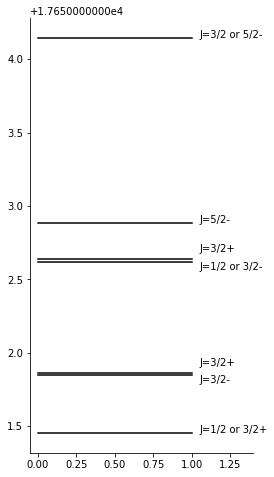

In [63]:
plt.figure(figsize=(4,8))
levels = np.array([17651.4518, 17654.1463,17652.6182,17651.8466, 17652.8845,17651.8629,17652.6354])
labels = np.array(['J=1/2 or 3/2+', 'J=3/2 or 5/2-','J=1/2 or 3/2-', 'J=3/2-','J=5/2-','J=3/2+','J=3/2+'])
idx = np.argsort(levels)
levels = np.array(levels[idx])
labels = np.array(labels[idx])
offset = np.array([0,1,1,1,1,0,0])*0.05
i=0
for level,label,off in zip(levels,labels,offset):
    plt.plot(np.arange(2),np.zeros(2)+level,'k')
    plt.annotate(label,(1.05,level+(-1)**i*off))
    i+=1
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(-0.05,1.4);

In [25]:
17651.4518 - 2.9467758

17648.5050242

In [83]:
A000 = MoleculeLevels.initialize_state('YbOH','174','A000',[1,2,3,4,5,6,7,8,9,10,11,12],M_values = 'none',I=[0,0],S=1/2,round=8,P_values=[1/2,3/2])

Cannot construct decoupled basis without M values


In [84]:
# def track_transition_E(state_g,qdict_g,state_e,qdict_e,Ez,B0,dipole='z',parity_g='-',parity_e='+',Debye=1.465):
#     tables = []
#     lines = []
#     g_idx = state_g.select_q(qdict_g,parity=parity_g)
#     e_idx = state_e.select_q(qdict_e,parity=parity_e)
#     for E0 in Ez:
#         print(E0)
#         if dipole=='z': 
#             TDM = Debye*calculate_TDMs(0,state_g,state_e,E0,B0)
#         elif dipole=='x':
#             TDM = Debye*(-1/np.sqrt(2)*(calculate_TDMs(1,state_g,state_e,E0,B0) - calculate_TDMs(-1,state_g,state_e,E0,B0)))
#         elif dipole=='+':
#             TDM = Debye*calculate_TDMs(1,state_g,state_e,E0,B0)
#         elif dipole=='-':
#             TDM = Debye*calculate_TDMs(-1,state_g,state_e,E0,B0)
#         elif dipole=='all':
#             TDM = Debye*1/np.sqrt(3)*sum([calculate_TDMs(p,state_g,state_e,E0,B0) for p in [0,1,-1]])
#         field_lines = []
#         field_table = []
#         for i in g_idx:
#             Eg = state_g.evals0[i]
#             vec_g = state_g.evecs0[i]
#             q_g = abs(vec_g).argmax()
#             for j in e_idx:
#                 Ee = state_e.evals0[j]
#                 vec_e = state_e.evecs0[j]
#                 q_e = abs(vec_e).argmax()
#                 dE = np.round((Ee - Eg)/2,7)
#                 strength = np.round(TDM[j,i],4)
#                 if strength >1e-4:
#                     Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
#                     Pe = {1:'+',-1:'-'}[state_e.parities[j]]
#                     Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
#                     Pg = {1:'+',-1:'-'}[state_g.parities[i]]
#                     t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me}))'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
#                     e_str = str(dE)
#                     d_str = str(strength)
#                     field_table.append([t_str,e_str,d_str])
#                     field_lines.append(dE)
#         lines.append(sorted(field_lines))
#         tables.append(sorted(field_table,key=lambda x: x[1]))
#     return lines,tables

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

def transitions_B(state_g,state_e,Bsample,dipole='z',origin=0,Debye=5.24,cm=False,scale=2):
    if state_g.evecs_B is None:
        print('Run ZeemanMap on Ground State')
        return
    if state_e.evecs_B is None or not np.array_equiv(state_e.Bz,state_g.Bz):
        print('Run ZeemanMap on Excited State with same fields as Ground State')
        return
    print('Using E (V/cm) field of',state_g._Ez)
    gBz = state_g.Bz
    TDM_B = np.zeros((len(Bsample),state_e.size,state_g.size))
    dE_B = np.zeros((len(Bsample),state_e.size,state_g.size))
    t_str_B = np.empty_like(dE_B, dtype='object')
    for iB,B0 in enumerate(Bsample):
        idx = np.searchsorted(gBz,B0)
        B0 = gBz[idx]
        print(B0)
        TDM_func = partial(calculate_forbidden_TDM_evecs,G_evecs=state_g.evecs_B[idx],Ground=state_g,E_evecs = state_e.evecs_B[idx],Excited=state_e,scale=scale)
        TDM_dict = {
            'z': TDM_func(0),
            '+': TDM_func(1),
            '-': TDM_func(-1),
                   }
        if dipole=='z' or dipole=='+' or dipole=='-':
            TDM = TDM_dict[dipole]
        elif 'x' in dipole:
            TDMx = -1/np.sqrt(2)*(TDM_dict['+']-TDM_dict['-'])
            if dipole=='x':
                TDM=TDMx
            elif dipole=='x+z' or dipole=='z+x':
                TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_dict['z']))
        elif dipole=='all':
            TDM = 1/np.sqrt(3)*(TDM_dict['z']+TDM_dict['+']+TDM_dict['-'])
        else:
            TDM = 1/np.sqrt(3)*(abs(TDM_dict['z'])+abs(TDM_dict['+'])+abs(TDM_dict['-']))
        TDM*=Debye
        TDM_B[iB,:,:] = TDM
        for i in range(state_g.size):
            Eg = state_g.evals_B[idx][i]
            vec_g = state_g.evecs_B[0][i] #correlate with zero field state
            q_g = abs(vec_g).argmax()
            for j in range(state_e.size):
                Ee = state_e.evals_B[idx][j]+origin*(29979.2458)
                vec_e = state_e.evecs_B[0][j]
                q_e = abs(vec_e).argmax()
                dE = (Ee - Eg)
                if cm:
                    dE/=(29979.2458)
                dE_B[iB,j,i] = dE
                Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                if Me % 1 == 0:
                    Me=int(Me)
                    Mg = int(Mg)
                    Fe = int(Fe)
                    Fg = int(Fg)
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(J={Je}{Pe},F={Fe},M={Me})'.format(Je=Je,Fe=Fe,Me=Me,Pe=Pe,Ng=Ng,Jg=Jg,Fg=Fg,Mg=Mg,Pg=Pg)
                t_str_B[iB,j,i] = t_str
    return TDM_B,dE_B,t_str_B


def transitions_E(state_g,state_e,Esample,origin = 0,dipole='z',Debye=5.24,cm=True,scale=2):
    if state_g.evecs_E is None:
        print('Run StarkMap on Ground State')
        return
    if state_e.evecs_E is None or not np.array_equiv(state_e.Ez,state_g.Ez):
        print('Run StarkMap on Excited State with same fields as Ground State')
        return
    print('Using B (G) field of',state_g._Bz)
    gEz = state_g.Ez
    TDM_E = np.zeros((len(Esample),state_e.size,state_g.size))
    dE_E = np.zeros((len(Esample),state_e.size,state_g.size))
    t_str_E = np.empty_like(dE_E, dtype='object')
    for iE,E0 in enumerate(Esample):
        idx = np.searchsorted(gEz,E0)
        E0 = gEz[idx]
        print(E0)
        TDM_func = partial(calculate_forbidden_TDM_evecs,G_evecs=state_g.evecs_E[idx],Ground=state_g,E_evecs = state_e.evecs_E[idx],Excited=state_e,scale=scale)
        TDM_dict = {
            'z': TDM_func(0),
            '+': TDM_func(1),
            '-': TDM_func(-1),
                   }
        if dipole=='z' or dipole=='+' or dipole=='-':
            TDM = TDM_dict[dipole]
        elif 'x' in dipole:
            TDMx = -1/np.sqrt(2)*(TDM_dict['+']-TDM_dict['-'])
            if dipole=='x':
                TDM=TDMx
            elif dipole=='x+z' or dipole=='z+x':
                TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_dict['z']))
        elif dipole=='all':
            TDM = 1/np.sqrt(3)*(TDM_dict['z']+TDM_dict['+']+TDM_dict['-'])
        else:
            TDM = 1/np.sqrt(3)*(abs(TDM_dict['z'])+abs(TDM_dict['+'])+abs(TDM_dict['-']))
        TDM*=Debye
        TDM_E[iE,:,:] = TDM
        for i in range(state_g.size):
            Eg = state_g.evals_E[idx][i]
            vec_g = state_g.evecs_E[0][i] #correlate with zero field state
            q_g = abs(vec_g).argmax()
            for j in range(state_e.size):
                Ee = state_e.evals_E[idx][j]+origin*(29979.2458)
                vec_e = state_e.evecs_E[0][j]
                q_e = abs(vec_e).argmax()
                dE = (Ee - Eg)
                if cm:
                    dE/=(29979.2458)
                dE_E[iE,j,i] = dE
                Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                if Me % 1 == 0:
                    Me=int(Me)
                    Mg = int(Mg)
                    Fe = int(Fe)
                    Fg = int(Fg)
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(J={Je}{Pe},F={Fe},M={Me})'.format(Je=Je,Fe=Fe,Me=Me,Pe=Pe,Ng=Ng,Jg=Jg,Fg=Fg,Mg=Mg,Pg=Pg)
                t_str_E[iE,j,i] = t_str
    return TDM_E,dE_E,t_str_E

def lorentzian(f,f0,g,N):
    return N*(g/2)**2 /((f-f0)**2 + (g/2)**2)

def simulate_spectra_E(TDM_E,dE_E,g_idx,e_idx,Esample,E0=0,g=7.9/(29979.2458),cut=True,dip=False,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency (cm-1)','Dipole Moment (D)']
    all_param = []
    flist = []
    TDMlist = []
    iE = np.searchsorted(Esample,E0)
    E0 = Esample[iE]
    for i in g_idx:
            for j in e_idx:
                _TDM = TDM_E[iE,j,i]
                _dE = dE_E[iE,j,i]
                if _dE<0:
                    continue
                flist.append(_dE)
                all_param.append([_dE,g,_TDM])
                TDMlist.append(_TDM)
    fmin = min(flist)-5*g
    fmax = max(flist)+5*g
    freq = np.linspace(fmin,fmax,1000)
    plt.figure()
    tot_lor = np.zeros(1000)
    for param in all_param:
        tot_lor+=lorentzian(freq,*param)
    if dip:
        tot_lor*=-1
    plt.plot(freq,tot_lor)
    return flist,tot_lor,TDMlist

def print_table_E(Evals,TDM_E,dE_E,t_str_E,g_idx,e_idx,cut=True,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency','Dipole Moment (D)']
    all_table = []
    for iE in range(len(Evals)):
        print('\nE (V/cm) =',Evals[iE])
        print('Pol =',dipole)
        E_table = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_E[iE,j,i]
                _dE = dE_E[iE,j,i]
                _t_str = t_str_E[iE,j,i]
                if _dE<=0:
                    continue
                if abs(_TDM)<thresh and cut:
                    continue
                E_table.append([_t_str,str(_dE),str(_TDM)])
        E_table = sorted(E_table,key=lambda x: float(x[1]))
        print(tabulate(E_table,headers=header,floatfmt=('','.5f','.5f')))
        all_table.append(E_table)
    return all_table

def print_table_B(Bvals,TDM_B,dE_B,t_str_B,g_idx,e_idx,cut=True,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency','Dipole Moment (D)']
    all_table = []
    for iB in range(len(Bvals)):
        print('\nB (G) =',Bvals[iB])
        print('Pol =',dipole)
        B_table = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_B[iB,j,i]
                _dE = dE_B[iB,j,i]
                _t_str = t_str_B[iB,j,i]
                if _dE<=0:
                    continue
                if abs(_TDM)<thresh and cut:
                    continue
                B_table.append([_t_str,str(_dE),str(_TDM)])
        B_table = sorted(B_table,key=lambda x: float(x[1]))
        print(tabulate(B_table,headers=header,floatfmt=('','.5f','.5f')))
        all_table.append(B_table)
    return all_table

def plot_B(Bvals,TDM_B,dE_B,g_idx=None,e_idx=None,Debye=2,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_B.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_B.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_B[:,j,i]
            _dE = dE_B[:,j,i]
            if _dE[0]<=0:
                continue
            if abs(_TDM).mean()<thresh:
                continue
            if abs(_TDM).mean()<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=np.square(_TDM).mean()/Debye
            scale = 0.5*(np.square(_TDM[1:])+np.square(_TDM[:-1]))/Debye
            if linescale is None:
                a.plot(Bvals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Bvals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Bvals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Magnetic Field (G)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return

def plot_E(Evals,TDM_E,dE_E,g_idx=None,e_idx=None,Debye=2,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_E.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_E.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_E[:,j,i]
            _dE = dE_E[:,j,i]
            if _dE[0]<=0:
                continue
            if abs(_TDM).mean()<thresh:
                continue
            if abs(_TDM).mean()<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=np.square(_TDM).mean()/Debye
            scale = 0.5*(np.square(_TDM[1:])+np.square(_TDM[:-1]))
            if linescale is None:
                a.plot(Evals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Evals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Evals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Electric Field (V/cm)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return

def simulate_Escan(Ez,TDM_E,dE_E,e,g,g_idx=None,e_idx=None,Debye=5.24,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_E.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_E.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_E[:,j,i]
            _dE = dE_E[:,j,i]
            if _dE[0]<=0:
                continue
            if abs(_TDM).mean()<thresh:
                continue
            if abs(_TDM).mean()<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=np.square(_TDM).mean()/Debye
            scale = 0.5*(np.square(_TDM[1:])+np.square(_TDM[:-1]))
            a.plot(Ez,)
            if linescale is None:
                a.plot(Evals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Evals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Evals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Electric Field (V/cm)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return

# def track_transition_B(state_g,qdict_g,state_e,qdict_e,Bscan,dipole='z',parity_g='-',parity_e='+',Debye=1.465):
#     tables = []
#     lines = []
#     g_idx = state_g.select_q(qdict_g,parity=parity_g)
#     e_idx = state_e.select_q(qdict_e,parity=parity_e)
#     if state_g.evecs_B is None:
#         print('Run ZeemanMap on Ground State')
#         return
#     if state_e.evecs_B is None:
#         print('Run ZeemanMap on Excited State')
#         return
#     for B0 in Bscan:
#         idx = np.searchsorted(Bz,B0)
#         B0 = Bz[idx]
#         print(B0)
#         if dipole=='z': 
#             TDM = Debye*calculate_TDM_evecs(0,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='x':
#             TDM = Debye*(-1/np.sqrt(2)*sum([p*calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e) for p in [-1,1]]))
#         elif dipole=='+':
#             TDM = Debye**calculate_TDM_evecs(1,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='-':
#             TDM = Debye**calculate_TDM_evecs(-1,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='all':
#             TDM = Debye*1/np.sqrt(3)*sum([(-1)**p*calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e) for p in [0,1,-1]])
#         else:
#             TDM = Debye*1/np.sqrt(3)*sum([abs(calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)) for p in [0,1,-1]])
#         field_lines = []
#         field_table = []
#         for i in g_idx:
#             Eg = state_g.evals_B[idx][i]
#             vec_g = state_g.evecs_B[idx][i]
#             q_g = abs(vec_g).argmax()
#             for j in e_idx:
#                 Ee = state_e.evals_B[idx][j]
#                 vec_e = state_e.evecs_B[idx][j]
#                 q_e = abs(vec_e).argmax()
#                 dE = np.round((Ee - Eg)/2,7)
#                 strength = np.round(TDM[j,i],5)
#                 if abs(strength) >1e-5:
#                     Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
#                     Pe = {1:'+',-1:'-'}[state_e.parities[j]]
#                     Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
#                     Pg = {1:'+',-1:'-'}[state_g.parities[i]]
#                     t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
#                     e_str = str(dE)
#                     d_str = str(strength)
#                     field_table.append([t_str,e_str,d_str])
#                     field_lines.append(dE)
#         lines.append(field_lines)
#         tables.append(sorted(field_table,key=lambda x: x[1]))
#     return lines,tables

# def all_B_tracking(state,g_q,e_q,Bvals,dipole='z',reorder_missing=True,plot=True):
#     B_lines,B_tables = track_transition_B(state,g_q,state,e_q,Bvals,dipole)
#     header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
#     for i in range(len(Bvals)):
#         print('\nB (G) =',Bvals[i])
#         print('Pol =',dipole)
#         print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.4f')))
#     for i,B in enumerate(B_lines):
#         print('Number of lines:',len(B))
#     if plot:   
#         B_linesT = plot_B_tracking(Bvals,B_lines,dipole,reorder_missing)
#         return B_lines,B_tables,B_linesT
#     else:
#         return B_lines,B_tables

# def plot_B_tracking(Bvals,B_lines,B_tables=None,dipole='z',reorder_missing=True,title=None,figure=None,color=None,marker='o'):
#     nlast = len(B_lines[-1])
#     for i,B in enumerate(B_lines):
#         while len(B)<nlast:
#             if reorder_missing:
#                 B_lines[i].append(B_lines[i][-1])
#             else:
#                 nlast=len(B)
#     BT = list(zip(*B_lines))
#     if figure is None:
#         plt.figure(figsize=(8,6))
#     else:
#         plt.figure(figure)
#     for i,line in enumerate(BT):
#         linestyle='solid'
#         if B_tables is not None:
#             strength = [float(B_tables[b][i][-1]) for b in range(1,len(B_tables))]
#             strength_avg = sum(strength)/(len(strength))
#             if strength_avg<0.05:
#                 linestyle='dotted'
#         if color is None:
#             plt.plot(Bvals,line,marker=marker,mfc='white',linestyle=linestyle)
#         else:
#             plt.plot(Bvals,line,marker=marker,mfc='white',linestyle=linestyle,color=color)
#     plt.xlabel('Magnetic Field (G)',fontsize=14)
#     plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions, {} Pol'.format(dipole)
#     plt.title(title,fontsize=18)
#     plt.ticklabel_format(useOffset=False, style='plain')
#     return BT

# def Forbidden_TDM_b2a(p,Ground,Excited,coeffs = [0.852, 0.087, 0.516],dA=2.32,dB=1.87): #uA010,kA010,B010
#     G_qn = Ground.q_numbers
#     E_qn = Excited.q_numbers
    
#     G_qnA = Ground.alt_q_numbers['aBJ']
#     G_b2a = Ground.library.basis_changers['a_bBJ'](G_qn,G_qnA)
#     G_qnA_v = Ground.alt_q_numbers['vibronic']
#     G_vibronic = Ground.library.basis_changers['X010_vibronic'](G_qnA,G_qnA_v)
    
#     E_qnA = E_qn
#     E_qnA_v = Excited.alt_q_numbers['vibronic']
#     uA010_qn = Excited.alt_q_numbers['uA010']
#     kA010_qn = Excited.alt_q_numbers['kA010']
#     B010_qn = Excited.alt_q_numbers['B010']
#     E_vibronic = Excited.library.basis_changers['A000_vibronic'](E_qnA,E_qnA_v)
#     uA010_mixing = Excited.library.basis_changers['A000_uA010'](E_qnA_v,uA010_qn) 
#     kA010_mixing = Excited.library.basis_changers['A000_kA010'](E_qnA_v,kA010_qn)
#     B010_mixing = Excited.library.basis_changers['A000_B010'](E_qnA_v,B010_qn)
    
#     TDM_u = dA*Excited.library.TDM_p_forbidden_builders[Excited.iso_state](p,G_qnA_v,uA010_qn)
#     TDM_k = dA*Excited.library.TDM_p_forbidden_builders[Excited.iso_state](p,G_qnA_v,kA010_qn)
#     TDM_B = dB* Excited.library.TDM_p_forbidden_builders[Excited.iso_state](p,G_qnA_v,B010_qn)
    
#     TDM_p = E_vibronic.T@(coeffs[0]*uA010_mixing.T@TDM_u + coeffs[1]*kA010_mixing.T@TDM_k + coeffs[2]*B010_mixing.T@TDM_B)@G_vibronic@G_b2a
#     return TDM_p


def Forbidden_TDM_b2a(p,Ground,Excited,coeffs = [0.5, 0.5, -0.5]): #uA010,kA010,B010
    G_qn = Ground.q_numbers
    E_qn = Excited.q_numbers
    
    G_qnA = Ground.alt_q_numbers['aBJ']
    G_b2a = Ground.library.basis_changers['a_bBJ'](G_qn,G_qnA)
    G_qnA_v = Ground.alt_q_numbers['vibronic']
    
    E_qnA = E_qn
    
    TDM_u = Excited.library.TDM_p_forbidden_builders['uA010'](p,G_qnA,E_qnA)
    TDM_k = Excited.library.TDM_p_forbidden_builders['kA010'](p,G_qnA,E_qnA)
    TDM_B = Excited.library.TDM_p_forbidden_builders['B010'](p,G_qnA,E_qnA)
    
    TDM_p = (coeffs[0]*TDM_u + coeffs[1]*TDM_k + coeffs[2]*TDM_B)@G_b2a
    return TDM_p

def TDM_b2a(p,Ground,Excited):
    G_qn = Ground.q_numbers
    E_qn = Excited.q_numbers
    
    G_qnA = Ground.alt_q_numbers['aBJ']
    G_b2a = Ground.library.basis_changers['a_bBJ'](G_qn,G_qnA)
    
    E_qnA = E_qn
    
    TDM_p = Excited.library.TDM_p_builders['174A000'](p,[1,-1],G_qnA,E_qnA)@G_b2a
    return TDM_p

def Forbidden_TDM_kuB(p,Ground,Excited): #uA010,kA010,B010
    G_qn = Ground.q_numbers
    E_qn = Excited.q_numbers
    
    G_qnA = Ground.alt_q_numbers['aBJ']
    G_b2a = Ground.library.basis_changers['a_bBJ'](G_qn,G_qnA)
    G_qnA_v = Ground.alt_q_numbers['vibronic']
    
    E_qnA = E_qn
    
    TDM_u = Excited.library.TDM_p_forbidden_builders['uA010'](p,G_qnA,E_qnA)
    TDM_k = Excited.library.TDM_p_forbidden_builders['kA010'](p,G_qnA,E_qnA)
    TDM_B = Excited.library.TDM_p_forbidden_builders['B010'](p,G_qnA,E_qnA)
    
    TDM_p_u = TDM_u@G_b2a
    TDM_p_k = TDM_k@G_b2a
    TDM_p_B = TDM_B@G_b2a
    return np.array([TDM_p_u,TDM_p_k,TDM_p_B])

# def Forbidden_TDM_kuB(p,Ground,Excited):
#     G_qn = Ground.q_numbers
#     E_qn = Excited.q_numbers
    
#     G_qnA = Ground.alt_q_numbers['aBJ']
#     G_b2a = Ground.library.basis_changers['a_bBJ'](G_qn,G_qnA)
#     G_qnA_v = Ground.alt_q_numbers['vibronic']
#     G_vibronic = Ground.library.basis_changers['X010_vibronic'](G_qnA,G_qnA_v)
    
#     E_qnA = E_qn
#     E_qnA_v = Excited.alt_q_numbers['vibronic']
#     uA010_qn = Excited.alt_q_numbers['uA010']
#     kA010_qn = Excited.alt_q_numbers['kA010']
#     B010_qn = Excited.alt_q_numbers['B010']
#     E_vibronic = Excited.library.basis_changers['A000_vibronic'](E_qnA,E_qnA_v)
#     uA010_mixing = Excited.library.basis_changers['A000_uA010'](E_qnA_v,uA010_qn) 
#     kA010_mixing = Excited.library.basis_changers['A000_kA010'](E_qnA_v,kA010_qn)
#     B010_mixing = Excited.library.basis_changers['A000_B010'](E_qnA_v,B010_qn)
    
#     TDM_u = dA*Excited.library.TDM_p_forbidden_builders[Excited.iso_state](p,G_qnA_v,uA010_qn)
#     TDM_k = dA*Excited.library.TDM_p_forbidden_builders[Excited.iso_state](p,G_qnA_v,kA010_qn)
#     TDM_B = dB* Excited.library.TDM_p_forbidden_builders[Excited.iso_state](p,G_qnA_v,B010_qn)
    
#     TDM_p_u = E_vibronic.T@uA010_mixing.T@TDM_u@G_vibronic@G_b2a
#     TDM_p_k = E_vibronic.T@kA010_mixing.T@TDM_k@G_vibronic@G_b2a
#     TDM_p_B = E_vibronic.T@B010_mixing.T@TDM_B@G_vibronic@G_b2a
#     return np.array([TDM_p_u,TDM_p_k,TDM_p_B])

def select_dipole(dipole,TDM_func):
    if dipole == 'z':
        TDM = TDM_func(0)
    elif dipole == '+':
        TDM = TDM_func(1)
    elif dipole == '-':
        TDM = TDM_func(1)
    elif 'x' in dipole:
        TDMx = -1/np.sqrt(2)*(TDM_func(1)-TDM_func(-1))
        if dipole=='x':
            TDM=TDMx
        elif dipole=='x+z' or dipole=='z+x':
            TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_func(0)))
    else:
        TDM = 1/np.sqrt(3)*(abs(TDM_func(-1))+abs(TDM_func(0))+abs(TDM_func(1)))
    return TDM
    


def simulate_transitions(field_vals,state_g,state_e,E_or_B='E',origin = 0,dipole='z',Debye=5.24,cm=True,coeffs = [0.852, 0.087, 0.516]):
    if E_or_B=='E':
        if state_g.evecs_E is None:
            print('Run StarkMap on Ground State')
            return
        if state_e.evecs_E is None or not np.array_equiv(state_e.Ez,state_g.Ez):
            print('Run StarkMap on Excited State with same fields as Ground State')
            return
        print('Using B (G) field of',state_g._Bz)
        g_field = state_g.Ez
    TDM_vs_field = np.zeros((len(field_vals),state_e.size,state_g.size))
    dE_vs_field = np.zeros((len(field_vals),state_e.size,state_g.size))
    t_str_vs_field = np.empty_like(dE_vs_field, dtype='object')
    TDM_func = partial(Forbidden_TDM_b2a,Ground=state_g,Excited=state_e,coeffs=coeffs)
    TDM = select_dipole(dipole,TDM_func)
    f_idx = np.searchsorted(g_field,field_vals)
    if E_or_B == 'E':
        E_evecs = state_e.evecs_E[f_idx,:,:]
        G_evecs = state_g.evecs_E[f_idx,:,:]
        E_evals = state_e.evals_E[f_idx,:]
        G_evals = state_g.evals_E[f_idx,:]
    if cm:
        E_evals/=29979.2458
        G_evals/=29979.2458
    E_evals+= origin
    TDM_vs_field = np.matmul(E_evecs,np.matmul(TDM,np.transpose(G_evecs,axes=[0,2,1])))
    dE_vs_field = np.array([np.subtract.outer(E_e, E_g) for E_e,E_g in zip(E_evals,G_evals)])
    return TDM_vs_field,dE_vs_field

def gen_t_str(field_vals,state_g,state_e,TDM_vs_field, dE_vs_field,E_or_B='E',dipole='z'):
    t_str_vs_field = np.empty_like(np.zeros((len(field_vals),state_e.size,state_g.size)), dtype='object')
    g_field = state_g.Ez
    f_idx = np.searchsorted(g_field,field_vals)
    if E_or_B == 'E':
        E_evecs = state_e.evecs_E[f_idx,:,:]
        G_evecs = state_g.evecs_E[f_idx,:,:]
    for i in range(state_g.size):
        vec_g = G_evecs[0,i,:]
        q_g = abs(vec_g).argmax()
        for j in range(state_e.size):
            vec_e = E_evecs[0,j,:]
            q_e = abs(vec_e).argmax()
            for k in range(len(f_idx)):
                dE = dE_vs_field[k,j,i]
                TDM = TDM_vs_field[k,j,i]
                Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                if Me % 1 == 0:
                    Me=int(Me)
                    Mg = int(Mg)
                    Fe = int(Fe)
                    Fg = int(Fg)
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(J={Je}{Pe},F={Fe},M={Me})'.format(Je=Je,Fe=Fe,Me=Me,Pe=Pe,Ng=Ng,Jg=Jg,Fg=Fg,Mg=Mg,Pg=Pg)
                t_str_vs_field[k,j,i] = t_str
    return t_str_vs_field

def plot_vs_field(field_vals,TDM_vs_field,dE_vs_field,g_idx=None,e_idx=None,Debye=2,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_E.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_E.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_vs_field[:,j,i]
            _dE = dE_vs_field[:,j,i]
            if _dE[0]<=0:
                print('low',_dE[0])
                continue
            if abs(_TDM).mean()<thresh:
                continue
            if abs(_TDM).mean()<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=np.square(_TDM).mean()
            scale = 0.5*(np.square(_TDM[1:])+np.square(_TDM[:-1]))
            if linescale is None:
                a.plot(field_vals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = field_vals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(field_vals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Electric Field (V/cm)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return

from scipy.optimize import curve_fit
from functools import partial

def fitFunction(xscale,data,function,guess,sigma,plot,bounds=None):
    xscale = np.array(xscale)
    data = np.array(data)
    guess = np.array(guess).astype(float)
    if bounds==None:
        bounds = (-np.inf,np.inf)
    try:
        popt,pcov = curve_fit(function,xscale,data,p0=guess,sigma=sigma,bounds=bounds)
        perr = np.round(np.sqrt((np.diag(pcov))),decimals=6)
        params = np.round(popt,decimals=6)
        fit = function(xscale,*popt)
        residuals = data - fit
        if plot:
            plotFitComparison(xscale,data,function,params,sigma)
            plotFitResiduals(xscale,residuals,sigma)
    except RuntimeError:
        print("Error - curve_fit failed")
        print(guess)
        plt.figure()
        plt.plot(xscale,data)
        plt.plot(xscale,function(xscale,*guess))
        params = []
        perr = []
        residuals = []
    return [params,perr,residuals]

def fit_intensities(xscale,data,state_g,state_e,field_EB,eg_idx_pairs,guess=[1.24,-0.1,-0.5],sigma=None,bounds=None,plot=True,verbose=False,dipole='z'):
    E0, B0 = field_EB
    G_evals,G_evecs = state_g.eigensystem(E0,B0)
    E_evals,E_evecs = state_e.eigensystem(E0,B0)
    TDM_func = partial(Forbidden_TDM_kuB,Ground=state_g,Excited=state_e)
    TDM_mats = select_dipole(dipole,TDM_func)
    function = partial(simulate_missing,TDM_u=TDM_mats[0],TDM_k=TDM_mats[1],TDM_B=TDM_mats[2],G_evals=G_evals,G_evecs=G_evecs,E_evals=E_evals,E_evecs=E_evecs,eg_idx_pairs=eg_idx_pairs)
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot,bounds=bounds)
    if verbose:
        print('Fit error = ',error)
        print('FIT PARAMS = ',params)
        print('\n')
    return [params,error,residuals]

def simulate_missing(xscale,u_coeff,k_coeff,B_coeff,TDM_u,TDM_k,TDM_B,G_evals,G_evecs,E_evals,E_evecs,eg_idx_pairs,origin =17998.5875-319.908907,square=True,cm=True,thresh=1e-3,g=10/(29979.2458)):
    TDM_EB = E_evecs@(u_coeff*TDM_u+k_coeff*TDM_k+B_coeff*TDM_B)@G_evecs.T
    if cm:
        E_evals/=29979.2458
        G_evals/=29979.2458
    E_evals+= origin
    dE_EB = np.subtract.outer(E_evals, G_evals)
    TDM_peaks = np.zeros(len(eg_idx_pairs))
    for k,(e_idx,g_idx) in enumerate(eg_idx_pairs):
        all_param = []
        flist = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_EB[j,i]
                _dE = dE_EB[j,i]
                if _dE<0:
                    continue
                if abs(_TDM) < thresh:
                    continue
                if square:
                    _TDM = np.square(_TDM)
                all_param.append([_dE,g,_TDM])
                flist.append(_dE)
        fmin = min(flist)-10*g
        fmax = max(flist)+10*g
        n=int((fmax-fmin)/(g/20))
        freq = np.linspace(fmin,fmax,n)
        tot_lor = np.zeros(n)
        for param in all_param:
            tot_lor+=lorentzian(freq,*param)
        TDM_peaks[k] = tot_lor.max()
    return TDM_peaks

# def prepare_TDM_info(field_EB, 

# def simulate_spectra_evecs(G_evecs,G_evals,E_evecs,E_evals,T=4,origin = 0,square=True,pad=10,dipole='z',cm=True,coeffs = [0.852, 0.087, 0.516],thresh=1e-3,g=7.9/(29979.2458),dip=False,plot=True):
    
def simulate_spectra(field_EB,state_g,state_e,g_idx=None,e_idx=None,T=4,origin = 0,P_adjust=False,square=True,pad=10,dipole='z',cm=True,thresh=1e-3,g=7.9/(29979.2458),dip=False,plot=True):
    E0, B0 = field_EB
    G_evals,G_evecs = state_g.eigensystem(E0,B0)
    E_evals,E_evecs = state_e.eigensystem(E0,B0)
    TDM_func = partial(TDM_b2a,Ground=state_g,Excited=state_e)
    TDM_mat = select_dipole(dipole,TDM_func)
    TDM_EB = E_evecs@TDM_mat@G_evecs.T
    if cm:
        E_evals = E_evals/29979.2458
        G_evals= G_evals/29979.2458
    E_evals += origin
    dE_EB = np.subtract.outer(E_evals, G_evals)
    if g_idx is None:
        g_idx = state_g.select_q({})
        print(len(g_idx))
    if e_idx is None:
        e_idx = state_e.select_q({})
        print(len(e_idx))
    all_param = []
    flist = []
    TDMlist = []
    for i in g_idx:
            for j in e_idx:
                arg_max = np.argmax(G_evecs[i])
                N= state_g.q_numbers['N'][arg_max]
                Jg = state_g.q_numbers['J'][arg_max]
                arg_max_e = np.argmax(E_evecs[j])
                Je = state_e.q_numbers['J'][arg_max_e]
                if N==1:
                    boltz=1
                else:
                    boltz = np.exp(-0.352*N*(N+1)/T)
                _TDM = TDM_EB[j,i]
                _dE = dE_EB[j,i]
                if _dE<0:
                    continue
                if abs(_TDM) < thresh:
                    continue
                flist.append(_dE)
                if square:
                    _TDM = np.square(_TDM)
                _TDM*= boltz
                if Jg>Je and P_adjust:
                    _TDM*=(2*Je+1)/(2*Jg+1)
                all_param.append([_dE,g,_TDM])
                TDMlist.append(_TDM)
                
    if flist==[]:
        flist.append(0)
        all_param.append([0,g,0])
        TDMlist.append(0)
    fmin = min(flist)-pad*g
    fmax = max(flist)+pad*g
    n=int((fmax-fmin)/(g/20))
    freq = np.linspace(fmin,fmax,n)
    tot_lor = np.zeros(n)
    for param in all_param:
        tot_lor+=lorentzian(freq,*param)
    if dip:
        tot_lor*=-1
    if plot:
        plt.figure()
        plt.plot(freq,tot_lor)
    return flist,(freq,tot_lor),TDMlist

def plotFitComparison(xscale,data,function,params,sigma,xlabel=None,ylabel=None):
    plt.figure()
    plt.title('Fit vs Data')
    if sigma is None:
        plt.plot(xscale,data,label='Data',marker='o')
    else:
        plt.errorbar(xscale,data,yerr=sigma,label='Data',marker='o',linestyle='None')
    plt.plot(xscale,function(xscale,*params),label='Fit')
    return

def plotFitResiduals(xscale,residuals,sigma):
    plt.figure()
    plt.title('Fit Residuals')
    if sigma is None:
        plt.plot(xscale,residuals,'o',linestyle='None')
    else:
        plt.errorbar(xscale,residuals,yerr=sigma,marker='o',linestyle='None')
    plt.plot(xscale,np.zeros(len(xscale)),linestyle='--')
    return

In [79]:
g = X000
e = A000

144
362


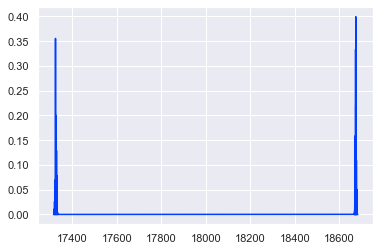

In [80]:
flist,[freq,tot_lor],TDMlist = simulate_spectra([0,0],g,e,g_idx=None,e_idx=e.select_q({'P':1/2}),T=4,origin = 17998.5875,P_adjust=False,square=True,pad=10,dipole='z',cm=True,thresh=1e-3,g=7.9/(29979.2458),dip=False,plot=True)

In [85]:
sorted(flist)

[17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17314.329268446316,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.134307486616,
 17315.955273159743,
 17315.955273159743,
 17315.955273159743,
 17315.955273159743,
 17315.955273159743,
 17315.955273159743,
 17315.955273159743,
 17315.955273159743,
 17316.792152112874,
 17316.792152112874,
 17316.792152112874,
 17316.792152112874,
 17316.792152112874,
 17316.792152112874,
 17316.792152112874,
 17317.644930302406,
 17317.644930302406,
 17317.644930302406,
 17317.644930302406,
 17317.644930302406,
 17317.644930302406,
 17318.51359299395,
 17318.51359299395,
 17318.51359299395,
 17318.51359299395,
 17318.51359299395,
 17319.398124762352,
 17319.398124762352,
 17319.39812476235

In [18]:
X010.eigensystem(0,1e-2,order=True,method='torch')
idx=X010.select_q({'N':2})

In [19]:
Ez = np.linspace(0,1000,1001)

In [30]:
print(36800-7300)
print(37200-6800)

29500
30400


In [32]:
30400/2

15200.0

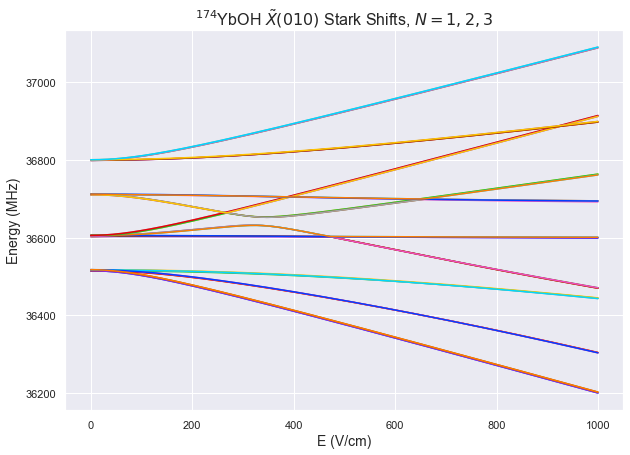

In [29]:
X010.StarkMap(Ez,1e-2,plot=True,idx=X010.select_q({'N':2}))

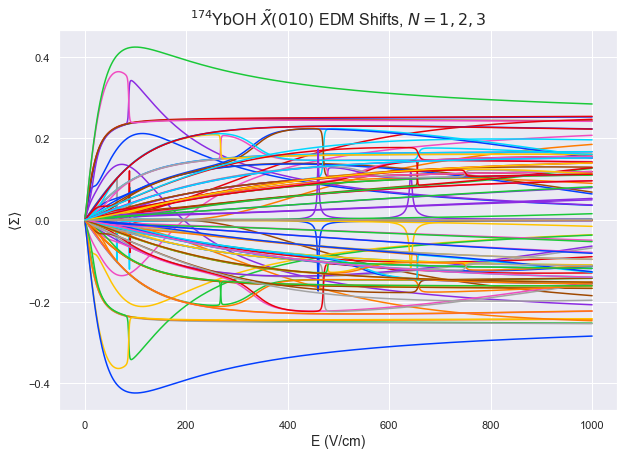

In [22]:
X010.PTV_Map('EDM',E_or_B='E',plot=True)

Text(0.5, 1.0, '$^{174}$YbOH $\\tilde{X}(010)$ EDM Shifts, E = 60 V/cm')

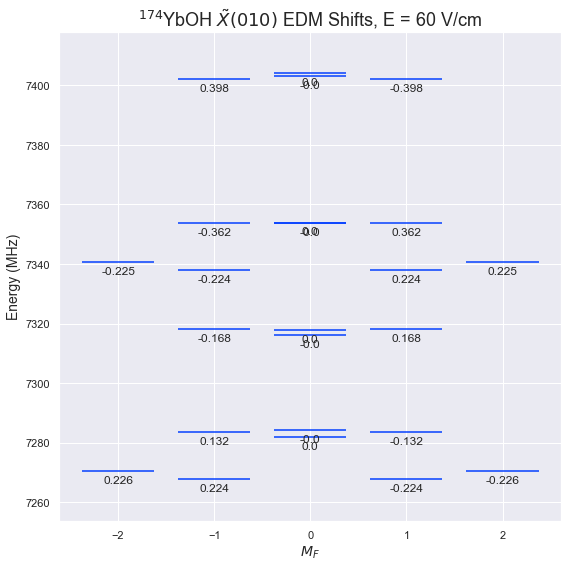

In [27]:
X010.display_PTV(60,1e-4,'EDM',round=3,idx=X010.select_q({'N':1}))
# plt.ylim(10300,10500)
plt.title(X010.state_str + ' EDM Shifts, E = {} V/cm'.format(X010.E0),fontsize=18)

In [14]:
X010=g
B0 = 1e-6
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'M':1})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    print('Parity=',X010.parities[i])
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 2  6 10 14 16 20 27 33 39 45 49 53 57 61]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

In [10]:
B0 = 1e-1
E0 = 200
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')

(7180.805813451389, 7483.137016990354)

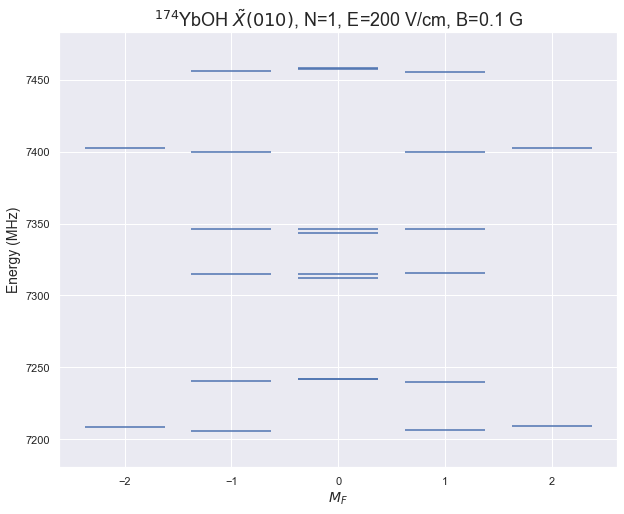

In [11]:
X010.display_levels(E0,B0,'J',idx=idx,parity=False,label=False,label_q=[q for q in X010.q_str if q not in ['N','F','K']],label_off=0.05,figsize=(10,8),alt_label=True)
plt.title(X010.state_str+', N=1, E={} V/cm, B={} G'.format(E0,B0),fontsize=18)
# plt.grid(False)
# ax = plt.gca()
# ax.set_facecolor('None')
plt.ylim()


In [3]:
g = MoleculeLevels.initialize_state('YbOH','174','X010',[1,2,3],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
e = MoleculeLevels.initialize_state('YbOH','174','A000',[1,2,3,4],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
Bz = np.linspace(1e-3,70,1001)
Ez = np.linspace(0,300,1001)
g.ZeemanMap(Bz,0,idx=g.select_q({'N':1}))
e.ZeemanMap(Bz,0,idx=e.select_q({'J':1.5,'P':1/2},parity='-'))
g.StarkMap(Ez,1e-4,idx=g.select_q({'N':1}))
e.StarkMap(Ez,1e-4,idx=e.select_q({'J':1.5,'P':1/2},parity='-'))

In [118]:
data = get_json_data('All_removeOverlap_3-7ms_fluor',numpy=True)[1:-4]
freq = get_json_data('All_removeOverlap_freq_i2_corrected',numpy=True)[1:-4]

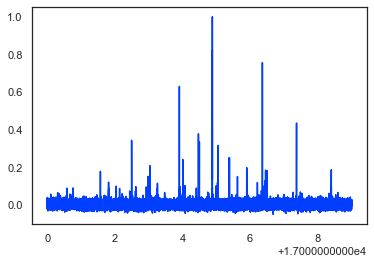

In [119]:
data_n = data/data.max()
plt.plot(freq,data_n)

In [120]:
phi =  np.pi/4
th = np.pi/4
v = np.array([np.cos(phi)*np.sin(th),np.sin(phi)*np.sin(th),np.cos(th)])
print(v)

[0.5         0.5         0.707106781]


In [197]:
# phi = 20/180*np.pi
# th = 32/180*np.pi
# v = np.array([np.cos(phi)*np.sin(th),np.sin(phi)*np.sin(th),np.cos(th)])
# print(v)
# v[-1]*=1/2.32
v=[1.4,0.85,1.2]
v=np.array(v)
print(v/np.sqrt(v@v))
square= True
g3 = g.select_q({'N':[1,2,3]})
e3 = e.select_q({'J':[0.5,1.5,2.5,3.5],'P':[1/2,-1/2]})
lx1,tx1,tdmx1 = simulate_spectra([0,0],g,e,g3,e3,origin = 17998.5875-319.908907,P_adjust=True,pad=1000,T=2,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=False);

[0.689521327 0.418637949 0.59101828 ]


In [155]:
#Free field: p 50, t 30, ba 1.87/2.32
#p 42, t 42, ba 1.2/2.23

In [156]:
sns.set_style('white')

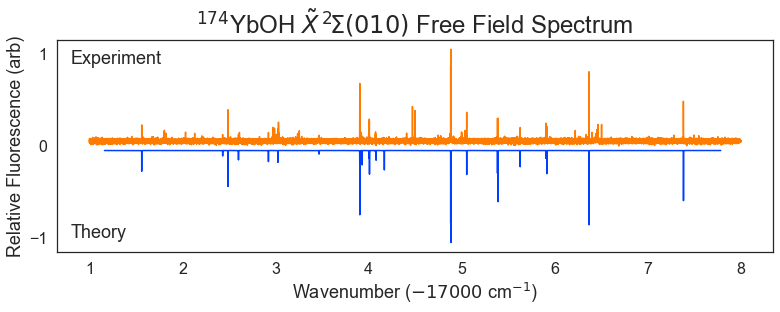

In [198]:
start, stop = (17001,17008)
i,j=(np.searchsorted(tx1[0],start),np.searchsorted(tx1[0],stop))
k,l = (np.searchsorted(freq,start),np.searchsorted(freq,stop))
plt.figure(figsize=(11,4.5))
tx_n = tx1[1]/tx1[1].max()
plt.plot(tx1[0][i:j]-17000,-tx_n[i:j]-0.05)
data_n = data/data.max()
plt.plot(freq[k:l]-17000,data_n[k:l]+0.05)
plt.ylabel('Relative Fluorescence (arb)',fontsize=18)
plt.xlabel(r'Wavenumber ($-17000$ cm$^{-1}$)',fontsize=18)
plt.annotate('Theory',(0.8,-1),fontsize=18)
plt.annotate('Experiment',(0.8,0.9),fontsize=18)
plt.xticks(fontsize=16);
plt.yticks([-1,0,1],fontsize=16);
plt.title(r'$^{174}$YbOH $\tilde{X}\, ^2\!\Sigma(010)$ Free Field Spectrum',fontsize=24)
plt.tight_layout()
# plt.savefig('X010_freefield_theory_exp_v1.svg')

In [21]:
g1 = g.select_q({'N':1,'J':[0.5]},parity='+')
e1 = e.select_q({'J':[0.5],'P':[1/2,-1/2]},parity='-')

g2 = g.select_q({'N':2,'J':2.5},parity='+')
e2 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')

g3 = g.select_q({'N':2,'J':2.5},parity='+')
e3 = e.select_q({'J':[2.5],'P':[1/2,-1/2]},parity='-')

eg_pairs = [(e1,g1), (e2,g2), (e3,g3)]

In [7]:
#Import Yuiki's data
folder = 'Yuiki_Stark'
title = '\\20220526_stark_identified_peaks'
peak_file = lambda volt: folder+title+str(volt)+'V.json'
err_file = lambda volt: folder+title+'_error'+str(volt)+'V.json'

V_range = np.array([0,5,15,20,25,30,35,50,75,95,115,132])
I_range = np.zeros(len(V_range))
peak_exp, err_exp = [[],[]]
for V,I in zip(V_range,I_range):
    peak_exp.append(get_json_data(peak_file(V),numpy=True))
    err_exp.append(get_json_data(err_file(V),numpy=True))


In [8]:
#Manual reanalysis of Yuiki's data, using normalization
peak_exp[0] = np.array([17004.882567, 17004.884673])
err_exp[0] = np.array([2.4e-05, 1.3e-05])
peak_exp[2] = np.array([17004.882464, 17004.884365, 17004.885582])
err_exp[2] = np.array([2.3e-05, 2.7e-05, 5.2e-05])
peak_exp[3] = np.array([17004.882367, 17004.884278, 17004.885645])
err_exp[3] = np.array([2.3e-05, 2.2e-05, 2.6e-05])
peak_exp[4] = np.array([17004.882253, 17004.883905, 17004.884641, 17004.885539])
err_exp[4] = np.array([2.7e-05, 2.1e-05, 2.7e-05, 8.2e-05])
peak_exp[5] = np.array([17004.882209, 17004.883847, 17004.884695, 17004.885613, 17004.886154])
err_exp[5] = np.array([2.4e-05, 1.2e-05, 2.3e-05, 3.6e-05, 4.9e-05])
peak_exp[6] = np.array([17004.882019, 17004.883712, 17004.88477,  17004.885697, 17004.88631])
err_exp[6] = np.array([2.6e-05, 2.1e-05, 3.0e-05, 3.0e-05, 2.7e-05])
peak_exp[7] = np.array([17004.881612, 17004.883184, 17004.883886, 17004.884811,
       17004.886095, 17004.886869])
err_exp[7] = np.array([2.8e-05, 3.6e-05, 3.0e-05, 5.3e-05, 3.9e-05, 3.8e-05])
peak_exp[8] = np.array([17004.880808, 17004.882198, 17004.883937, 17004.884871, 17004.886835,
 17004.887711])
err_exp[8] = np.array([1.8e-05, 1.8e-05, 2.2e-05, 2.3e-05, 1.9e-05, 3.2e-05])
peak_exp[9] = np.array([17004.880093, 17004.881501, 17004.883946, 17004.884782, 17004.887521,
 17004.888456])
err_exp[9] = np.array([2.3e-05, 3.9e-05, 3.90e-05, 7.20e-05, 2.40e-05, 3.00e-05])
peak_exp[10] = np.array([17004.879448, 17004.880818, 17004.88394,  17004.884837, 17004.888196,
 17004.88913 ])
err_exp[10] = np.array([2.4e-05, 2.8e-05, 3.0e-05, 6.6e-05, 1.8e-05, 3.3e-05])
peak_exp[11] = np.array([17004.880129, 17004.87885,  17004.88399,  17004.888762, 17004.889746])
err_exp[11] = np.array([2.0e-05, 2.0e-05, 2.3e-05, 2.4e-05, 2.2e-05])

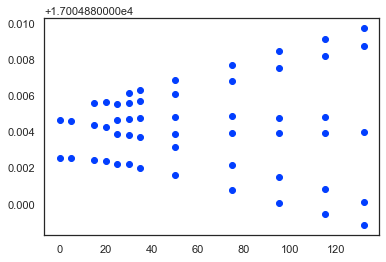

In [9]:
plt.figure()
for i,_V in enumerate(V_range):
    V = _V*np.ones(len(peak_exp[i]))
    plt.errorbar(V,peak_exp[i],yerr=err_exp[i],linestyle='None',marker='o',color='C0')

In [199]:
phi = 30/180*np.pi
th = 42/180*np.pi
v = np.array([np.cos(phi)*np.sin(th),np.sin(phi)*np.sin(th),np.cos(th)])
print(v)
v[-1]*=1.2/2.32
# v=[0.321393805, 0.383022222, 0.698046338]
print(v)
TDM_E, dE_E = simulate_transitions(np.linspace(0,264,101),g,e,E_or_B='E',origin = 17998.5875-319.908907,dipole='x',Debye=5.24,cm=True,coeffs = v)
t_str_E = gen_t_str(np.linspace(0,264,101),g,e,TDM_E, dE_E,E_or_B='E')

[0.579484104 0.334565303 0.743144825]
[0.579484104 0.334565303 0.384385255]
Using B (G) field of 0.0001


In [11]:
sns.set_style('white')

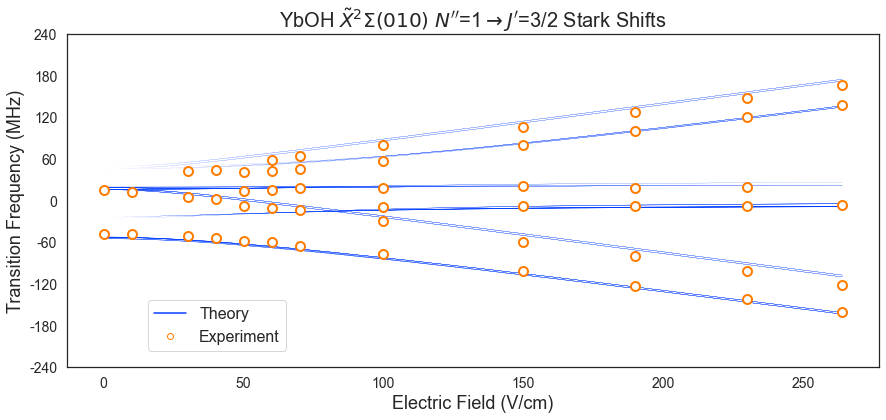

In [202]:
fig = plt.figure(figsize=(13,6))
plt.plot()
g.eigensystem(0,1e-2)
e.eigensystem(0,1e-2)
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
plot_vs_field(np.linspace(0,264,101),TDM_E,dE_E,e_idx=e3,g_idx=g3,linescale=10,thresh=1e-3,color='C0',marker='None',mfc='None',figure=fig)
plt.ylabel(r'Transition Frequency (MHz)',fontsize=18)
plt.xlabel('Electric Field (V/cm)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
colors = ['C0','C1']
mark = ['None','o']
mf = ['None','white']
linest = [None,'None']
lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m,linestyle=ls) for c,m,mk,ls in zip(colors,mf,mark,linest)]
labels = ['Theory','Experiment']
plt.legend(lines, labels,loc=(0.1,0.05),fontsize=16)
plt.title(r'YbOH $\tilde{X} ^2 \Sigma (010)$ $N^{\prime \prime}$=1$\rightarrow J^{\prime}$=3/2 Stark Shifts',fontsize=20)
for i,_V in enumerate(V_range):
    V = 2*_V*np.ones(len(peak_exp[i]))
    peaks = peak_exp[i]-0.000183
#     err = err_exp[i]*5
    err = 0.0002*np.ones(len(peak_exp[i]))
    plt.errorbar(V,peaks,yerr=err,linestyle='None',marker='o',color='C1',mfc='white',mew=2,markersize=9)
plt.tight_layout()
yticks = plt.yticks()
newlabels = [str(round(29979.2458*(val-17004.884))) for val in yticks[0]]
newticks = (yticks[0],newlabels)
plt.yticks(*newticks)
plt.savefig('X010_stark_shifts_B0_v2.svg')#,dpi=1000)

In [474]:
print(r'$N"$')

$N"$


In [463]:
newlabels = [str(np.round(29979.2458*(val-17004.884),0)) for val in yticks[0]]

In [462]:
new

['-239.8',
 '-179.9',
 '-119.9',
 '-60.0',
 '0.0',
 '60.0',
 '119.9',
 '179.9',
 '239.8']

In [14]:
freq0,sig0 = get_json_data('20220526_stark_0V.json',numpy=True)
freq50,sig50 = get_json_data('20220526_stark_50V.json',numpy=True)
freq115,sig115 = get_json_data('20220526_stark_115V.json',numpy=True)
freq0-=0.000183
freq50-=0.000183
freq115-=0.000183

Text(0.5, 0, 'Transition Frequency (MHz - Offset)')

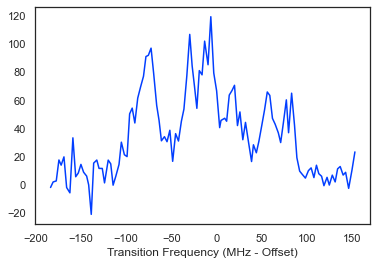

In [1060]:
plt.plot(29979.2458*(freq50-17004.884),sig50)
plt.xlabel('Transition Frequency (MHz - Offset)')

In [830]:
np.sqrt(0.7)

0.8366600265340756

In [87]:
# phi = 30/180*np.pi
# th = 42/180*np.pi
# v = np.array([np.cos(phi)*np.sin(th),np.sin(phi)*np.sin(th),np.cos(th)])
# print(v)
# v[-1]*=1.2/2.32
# # v=[0.321393805, 0.383022222, 0.698046338]
v=[-8,-0.5,7]
print(v)
v=np.array(v)
print(v/np.sqrt(v@v))
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([115*2,0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=15/(29979.2458),plot=False)
plt.figure()
i1 = 50
plt.plot(tx1[0][i1:-i1],tx1[1][i1:-i1]/tx1[1].max())
plt.plot(freq115,sig115/sig115.max(),color='C1')

[-8, -0.5, 7]
[-0.751745577 -0.046984099  0.65777738 ]


TypeError: _searchsorted_dispatcher() got an unexpected keyword argument 'linestyle'

<Figure size 432x288 with 0 Axes>

In [47]:
MHz = lambda x : 29979.2458*(x-17004.884)

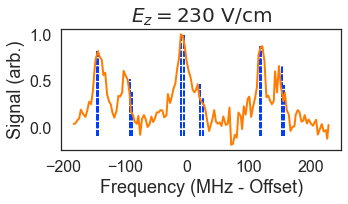

In [111]:
i1,j1 = (100,-80)
plt.figure(figsize=(5,3))
# plt.plot(MHz(tx1[0][i1:j1]),tx1[1][i1:j1]/tx1[1].max(),linestyle='-')
for lx in lx1:
    _i = np.searchsorted(freq115,lx)
    plt.vlines(MHz(lx),ymax=max(sig115[_i-2:_i+2]/sig115.max()),ymin=-0.1,linestyle='--',color='C0')
plt.plot(MHz(freq115),sig115/sig115.max(),linewidth=2, color = 'C1')#linewidth=0,marker='o',markersize=3.5)
plt.title(r'$E_z = 230 \,\,\mathrm{V/cm}$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([0,0.5,1],fontsize=16)
plt.xlabel('Frequency (MHz - Offset)',fontsize=18)
plt.ylabel('Signal (arb.)',fontsize=18)
plt.tight_layout();
plt.savefig('Stark_230Vcm_N1_dashed.svg')

[-8, -0.5, 7]
[-0.751745577 -0.046984099  0.65777738 ]


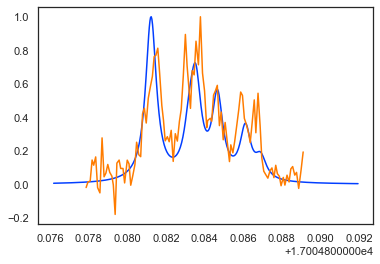

In [78]:
v=[-8,-0.5,7]
print(v)
v=np.array(v)
print(v/np.sqrt(v@v))
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx2,tx2,tdmx2 = simulate_spectra([50*2,0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=20/(29979.2458),plot=False)
plt.figure()
i2 = 50
plt.plot(tx2[0][i2:-i2],tx2[1][i2:-i2]/tx2[1].max())
plt.plot(freq50,sig50/sig50.max())

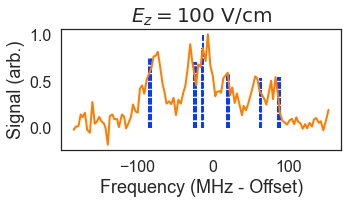

In [112]:
plt.figure(figsize=(5,3))
i2,j2 = (100,-120)
# plt.plot(MHz(tx2[0][i2:j2]),tx2[1][i2:j2]/tx2[1].max(),linestyle='-')
for lx in lx2:
    _i = np.searchsorted(freq50,lx)
    plt.vlines(MHz(lx),ymax=max(sig50[_i-2:_i+2]/sig50.max()),ymin=0,linestyle='--',color='C0')
plt.plot(MHz(freq50),sig50/sig50.max(),linewidth=2,color='C1')#linewidth=0,marker='o',markersize=3.5)
plt.title(r'$E_z = 100 \,\,\mathrm{V/cm}$',fontsize=20)
plt.xticks([-100,0,100],fontsize=16)
plt.yticks([0,0.5,1],fontsize=16)
plt.xlabel('Frequency (MHz - Offset)',fontsize=18)
plt.ylabel('Signal (arb.)',fontsize=18)
plt.tight_layout();
plt.savefig('Stark_100Vcm_N1_dashed.svg')

[-8, -0.5, 7]
[-0.751745577 -0.046984099  0.65777738 ]


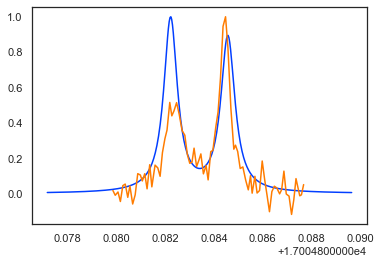

In [80]:
# phi = 30/180*np.pi
# th = 42/180*np.pi
# v = np.array([np.cos(phi)*np.sin(th),np.sin(phi)*np.sin(th),np.cos(th)])
# print(v)
# v[-1]*=1.2/2.32
# # v=[0.321393805, 0.383022222, 0.698046338]
v=[-8,-0.5,7]
print(v)
v=np.array(v)
print(v/np.sqrt(v@v))
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx3,tx3,tdmx3 = simulate_spectra([0*2,0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=20/(29979.2458),plot=False)
plt.figure()
i3 = 90
plt.plot(tx3[0][i1:-i1],tx3[1][i1:-i1]/tx3[1].max())
plt.plot(freq0,sig0/sig0.max())

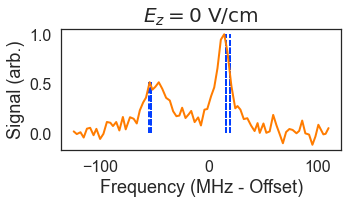

In [114]:
plt.figure(figsize=(5,3))
i3,j3=(110,-90)
# plt.plot(MHz(tx3[0][i3:j3]),tx3[1][i3:j3]/tx3[1].max())
for lx in lx3:
    _i = np.searchsorted(freq0,lx)
    plt.vlines(MHz(lx),ymax=max(sig0[_i-2:_i+2]/sig0.max()),ymin=0,linestyle='--',color='C0')
plt.plot(MHz(freq0),sig0/sig0.max(),linewidth=2,color='C1')#linewidth=0,marker='o',markersize=3.5)#linewidth=0,marker='o',markersize=3.5)
plt.title(r'$E_z = 0 \,\,\mathrm{V/cm}$',fontsize=20)
plt.xticks([-100,0,100],fontsize=16)
plt.yticks([0,0.5,1],fontsize=16)
plt.xlabel('Frequency (MHz - Offset)',fontsize=18)
plt.ylabel('Signal (arb.)',fontsize=18)
plt.tight_layout();
plt.savefig('Stark_0Vcm_N1_dashed.svg')

In [848]:
#things that kinda worked: 
#p 20, t 32, ba 1/2.32
#p 170, t 32, ba 0.6/2.32
#p 175, t 33, ba 0.8/2.32
#p 30, t 42, ba 1.2/2.32
#p 40, t 42, ba 1.2/2.32
#Free field: p 50, t 30, ba 1.87/2.32

In [568]:
E0=0
B0=0
square=True
# v=[1,1,0.5]
for e3,g3 in eg_pairs:
    v=[0.35,0.65,1]
    lx1,tx1,tdmx1 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

#     v = [1,1,-1]
#     # g3 = g.select_q({'N':2,'J':2.5},parity='+')
#     # e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
#     lx2,tx2,tdmx2 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

#     v = [-1,1,1]
#     # g3 = g.select_q({'N':2,'J':2.5},parity='+')
#     # e3 = e.select_q({'J':[2.5],'P':[1/2,-1/2]},parity='-')
#     lx3,tx3,tdmx3 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);
    
#     v = [1,-1,1]
#     # g3 = g.select_q({'N':2,'J':2.5},parity='+')
#     # e3 = e.select_q({'J':[2.5],'P':[1/2,-1/2]},parity='-')
#     lx3,tx3,tdmx3 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);
    

NameError: name 'eg_pairs' is not defined

Fit error =  [inf inf inf]
FIT PARAMS =  [0.35 0.65 1.  ]




C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


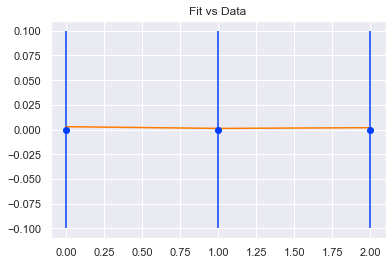

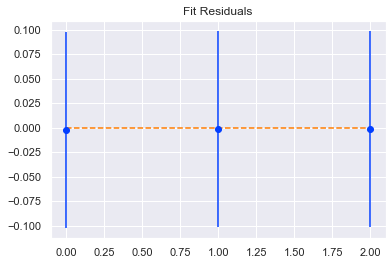

In [41]:
x = np.arange(0,len(eg_pairs))
data = np.zeros(len(eg_pairs))
sig = np.zeros(len(eg_pairs))
sig[:] = 0.1
params,err,resid = fit_intensities(x,data,g,e,[0,0],eg_pairs,guess=[0.35,0.65,1],sigma=sig,bounds=([-10,-10,-10],[10,10,10]),plot=True,verbose=True,dipole='z')

In [121]:
np.linspace(-3,3,31)

array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ])

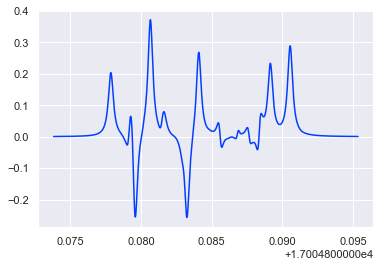

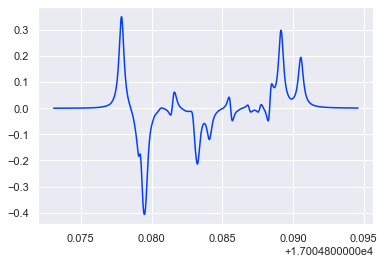

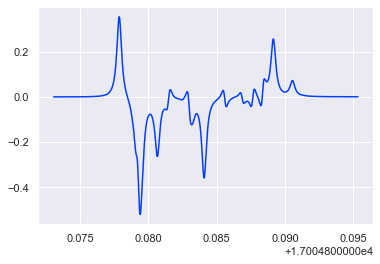

In [14]:
v = [1,0,0]
square= tRUE
E0 = 100
B0 = 70
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

v = [0,1,0]
# g3 = g.select_q({'N':2,'J':2.5},parity='+')
# e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx2,tx2,tdmx2 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

v = [0,0,1]
# g3 = g.select_q({'N':2,'J':2.5},parity='+')
# e3 = e.select_q({'J':[2.5],'P':[1/2,-1/2]},parity='-')
lx3,tx3,tdmx3 = simulate_spectra([E0,B0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

In [8]:
v = np.array([np.sqrt(3),np.sqrt(4),np.sqrt(9)])
v/=np.sqrt(v@v)
print(v)
square= True
g3 = g.select_q({'N':[1,2,3]})
e3 = e.select_q({'J':[0.5,1.5,2.5,3.5],'P':[1/2,-1/2]})
lx1,tx1,tdmx1 = simulate_spectra([0,0],g,e,g3,e3,origin = 17998.5875-319.908907,pad=1000,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=False);

[0.433012702 0.5         0.75       ]


KeyError: 'uA010'

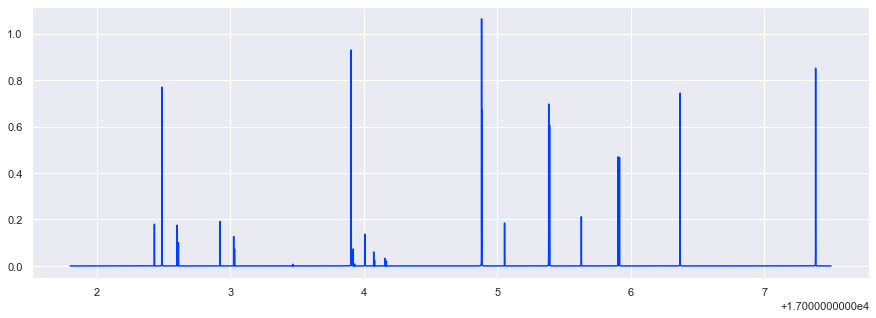

In [189]:
start, stop = (17001.8,17007.5)
i,j=(np.searchsorted(tx1[0],start),np.searchsorted(tx1[0],stop))
plt.figure(figsize=(15,5))
plt.plot(tx1[0][i:j],tx1[1][i:j])

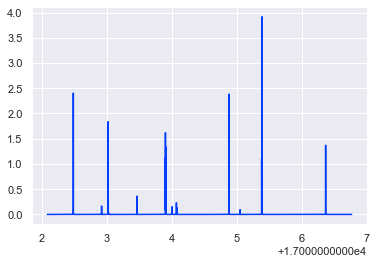

In [59]:
v = [1,1,0.5]
square= True
g3 = g.select_q({'N':[1,2]})
e3 = e.select_q({'J':[0.5,1.5,2.5],'P':[1/2,-1/2]})
lx1,tx1,tdmx1 = simulate_spectra([0,0],g,e,g3,e3,origin = 17998.5875-319.908907,pad=1000,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

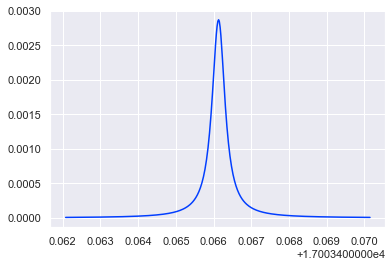

In [44]:
g3 = g.select_q({'N':1,'J':[0.5]},parity='+')
e3 = e.select_q({'J':[0.5],'P':[1/2,-1/2]},parity='-')
square= True
lx1,tx1,tdmx1 = simulate_spectra([0,0],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

[0.321393805 0.383022222 0.866025404]
[0.321393805 0.383022222 0.698046338]


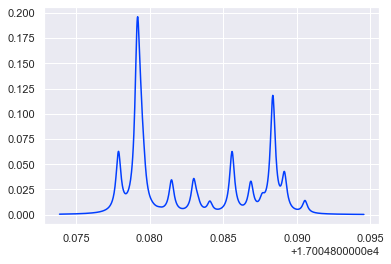

In [195]:
phi = 50/180*np.pi
th = 30/180*np.pi
v = np.array([np.cos(phi)*np.sin(th),np.sin(phi)*np.sin(th),np.cos(th)])
print(v)
v[-1]*=1.87/2.32
print(v)
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([100,70],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

[0.632455532 0.632455532 0.447213595]


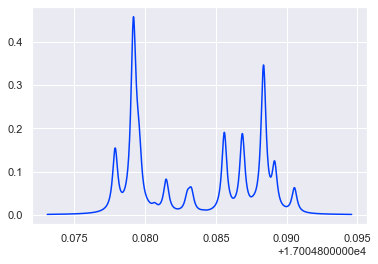

In [115]:
v = np.array([np.sqrt(2),np.sqrt(2),1])
v=v/np.sqrt(v@v)
print(v)
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([100,70],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

[0.554700196 0.480384461 0.67936622 ]


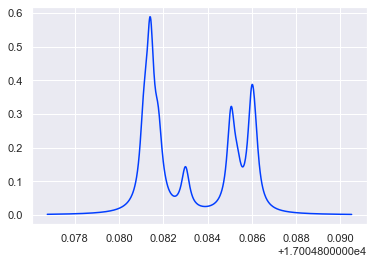

In [200]:
v = np.array([np.sqrt(4),np.sqrt(3),np.sqrt(6)])
v/=np.sqrt(v@v)
print(v)
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([0,30],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

[0.314485451 0.104828484 0.943456353]


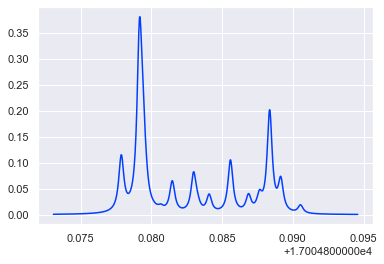

In [94]:
v = np.array([3,1,9])
v=v/np.sqrt(v@v)
print(v)
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([100,70],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

[0.666666667 0.666666667 0.333333333]


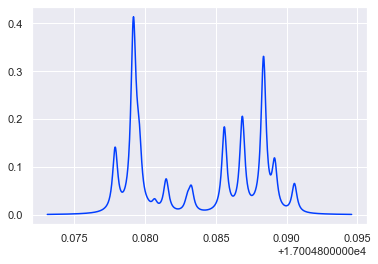

In [75]:
v = np.array([1,1,1/2])
v=v/np.sqrt(v@v)
print(v)
square= True
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
lx1,tx1,tdmx1 = simulate_spectra([100,70],g,e,g3,e3,origin = 17998.5875-319.908907,square=square,dipole='x',cm=True,coeffs=v,thresh=1e-3,g=12/(29979.2458),plot=True);

In [161]:
tdmx3

[0.0001307079993195859,
 3.343979523485602e-06,
 1.3665448567463444e-05,
 0.000455433908828133,
 9.906762861591423e-06,
 1.1449420335269954e-05,
 0.0034947620687369933,
 0.0001402705343033371,
 0.0024226998139642427,
 1.45857820917984e-06,
 0.0002601293327027177,
 0.00026560407811718233,
 9.051266044432854e-06,
 9.048637491936656e-06,
 5.408907086456862e-06,
 0.003562451187776473,
 9.095034066874018e-05,
 0.004001844898155503,
 2.543868042416939e-05,
 0.0007033231638696968,
 4.909531631833701e-05,
 0.0024227002910722547,
 1.661084805159331e-05,
 1.1518887356183468e-05,
 5.205106928590503e-05,
 3.127075841071831e-05,
 6.622130483398556e-06,
 0.00037935332793506346,
 0.00018158476094770775,
 8.876212797509828e-05,
 0.0038060892922118644,
 0.00012520084594347392,
 0.0010675828223969525,
 0.00012778100888512442,
 3.954653001600085e-05,
 8.405034071715623e-05,
 0.0004784233215001749,
 0.0008552472014204355,
 0.001958502404075527,
 0.00023925657846633888,
 7.236885156035451e-05,
 0.001885490

In [167]:
diff = np.array([np.subtract.outer(E_e, E_g) for E_e,E_g in zip(e.evals_E,g.evals_E)])

In [172]:
dE_E.shape

(101, 88, 24)

In [96]:
simulate_transitions(field_vals,state_g,state_e,E_or_B='E',origin = 0,dipole='z',Debye=5.24,cm=True,scale=-0.5)

NameError: name 'field_vals' is not defined

In [117]:
np.transpose(g.evecs_E,axes=[0,2,1]).shape

(1001, 24, 24)

In [79]:
x = np.array([1,2,3,4,5,6])
y = np.array([6,7,8,9,10,11])
np.subtract.outer(y,x)

array([[ 5,  4,  3,  2,  1,  0],
       [ 6,  5,  4,  3,  2,  1],
       [ 7,  6,  5,  4,  3,  2],
       [ 8,  7,  6,  5,  4,  3],
       [ 9,  8,  7,  6,  5,  4],
       [10,  9,  8,  7,  6,  5]])

In [66]:
Escan = np.linspace(0,240,13)
print(Escan)

[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 220. 240.]


In [70]:
np.searchsorted(Ez,Escan)

array([  0,  80, 160, 240, 320, 400, 480, 560, 640, 720, 800, 880, 960],
      dtype=int64)

In [69]:
Ez[idx]

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240.])

In [62]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [34]:
Bscan = np.linspace(0,70,6)
Bscan[0]=1e-3
print(Bscan)

# Escan = np.linspace(0,500,7)
Escan = np.linspace(0,240,11)
print(Escan)

[ 0.001 14.    28.    42.    56.    70.   ]
[  0.  24.  48.  72.  96. 120. 144. 168. 192. 216. 240.]


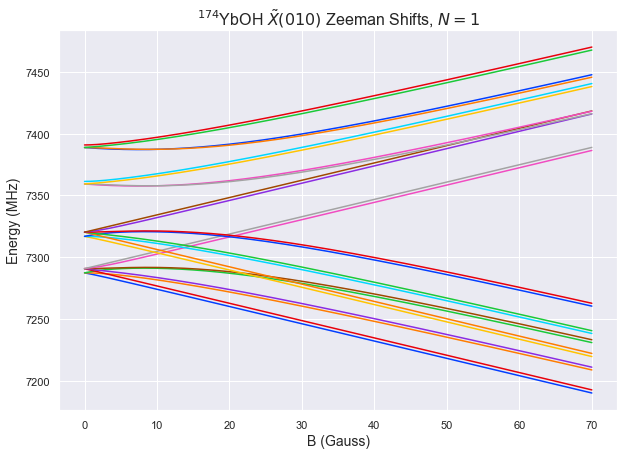

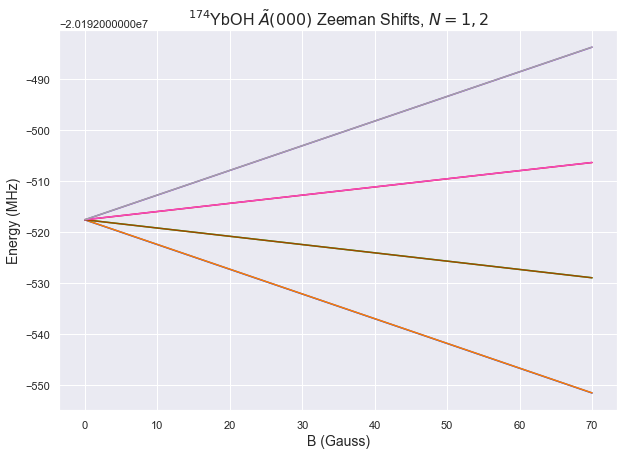

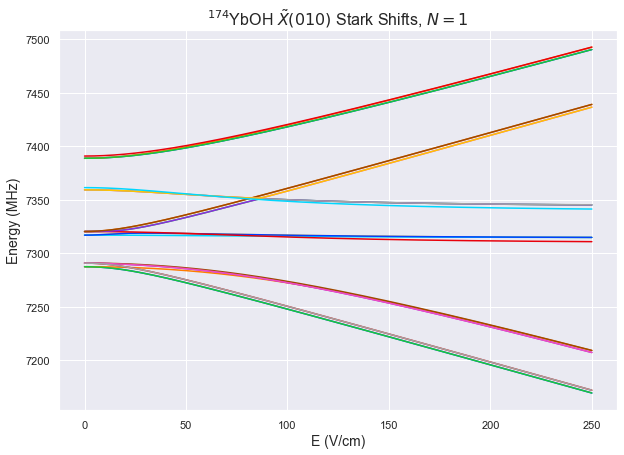

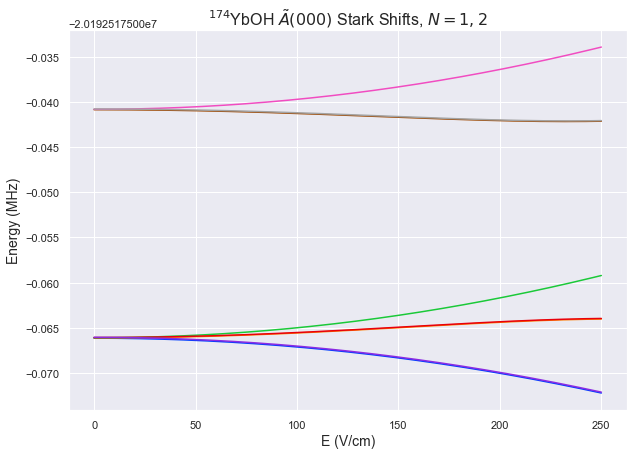

In [4]:
g = MoleculeLevels.initialize_state('YbOH','174','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
e = MoleculeLevels.initialize_state('YbOH','174','A000',[1,2],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
# Bstep = 0.001
# Bz = np.arange(0,1+Bstep,Bstep)
# Bz[0]=1e-4
# Estep = 0.25
# Ez = np.arange(0,500+Estep,Estep)
Bz = np.linspace(1e-3,70,1001)
Ez = np.linspace(0,250,1001)
g.ZeemanMap(Bz,0,idx=g.select_q({'N':1}),plot=True)
e.ZeemanMap(Bz,0,idx=e.select_q({'J':1.5,'P':1/2},parity='-'),plot=True)
g.StarkMap(Ez,1e-4,idx=g.select_q({'N':1}),plot=True)
e.StarkMap(Ez,1e-4,idx=e.select_q({'J':1.5,'P':1/2},parity='-'),plot=True)

In [285]:
TDM_E, dE_E = simulate_transitions(np.linspace(0,250,101),g,e,E_or_B='E',origin = 17998.5875-319.908907,dipole='z',Debye=5.24,cm=True,coeffs = [0.852, 0.087, 0.516])
t_str_E = gen_t_str(np.linspace(0,250,101),g,e,TDM_E, dE_E,E_or_B='E')

Using B (G) field of 0.0001


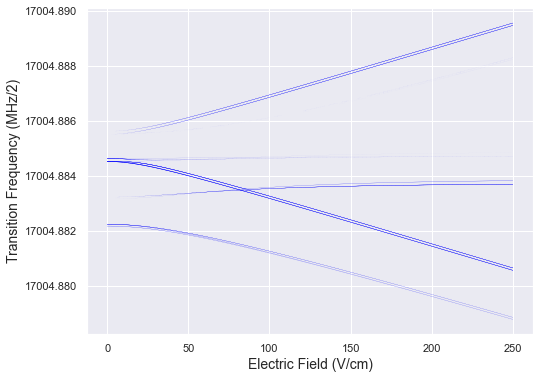

In [6]:
g.eigensystem(0,1e-2)
e.eigensystem(0,1e-2)
g1 = g.select_q({'N':1,'J':1.5})
e1 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
g2 = g.select_q({'N':1, 'J':0.5})
e2 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
g3 = g.select_q({'N':1})
e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
plot_vs_field(np.linspace(0,250,101),TDM_E,dE_E,e_idx=e3,g_idx=g3,linescale=5,thresh=1e-3,color='blue',marker='None',mfc='None')

In [128]:
t_str_E[0,0,0]

'(N=1-,J=1.5,F=1,M=-1)->(J=0.5-,F=1,M=-1)'

In [130]:
TDM[0,0,0]


-0.0

In [110]:
tdm = Forbidden_TDM_b2a(0,g,e,scale=1)
tdm.shape

(88, 24)

In [113]:
np.matmul(tdm,g.evecs_E).shape

(1001, 88, 24)

In [108]:
g.evecs_E[0].shape

(24, 24)

In [109]:
e.evecs_E[0].shape

(88, 88)

(7273.9759138283, 7404.3146470817)

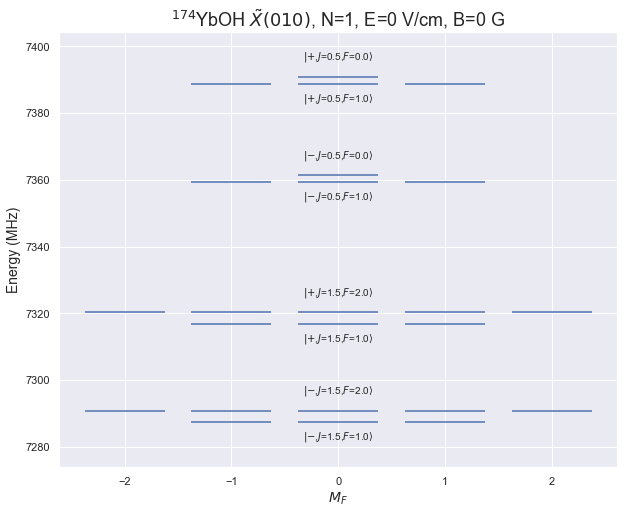

In [22]:
E0 = 0
B0 = 0
idx = g.select_q({'N':1,'J':[0.5,1.5]})
g.display_levels(E0,B0,'F',idx=idx,parity=True,label=True,label_q=[q for q in g.q_str if q not in ['N','K']],label_off=0.05,figsize=(10,8),alt_label=True)
plt.title(g.state_str+', N=1, E={} V/cm, B={} G'.format(E0,B0),fontsize=18)
# plt.grid(False)
# ax = plt.gca()
# ax.set_facecolor('None')
plt.ylim()

In [23]:
Trans_E = {}
D=5.24
origin = 17998.59-319.908907
# origin = 0
cm=True
scale=-0.5
for _E in Escan:
    g.ZeemanMap(Bz,_E,plot=False)
    e.ZeemanMap(Bz,_E,plot=False)
    Trans_E[_E] = {#'all': transitions_E(g,e,Escan,dipole='abs',Debye=5.24,origin=17323.5875-319.9089),
                   'x': transitions_B(g,e,Bscan,dipole='x',Debye=D,origin=origin,cm=cm,scale=scale),
                   'z': transitions_B(g,e,Bscan,dipole='z',Debye=D,origin=origin,cm=cm,scale=scale),
#                    'x+z': transitions_E(g,e,Escan,dipole='x+z',Debye=5.24,origin=17323.5875-319.9089),
                  }
#output of transitions_E is TDM_E, dE_E, table_E

Using E (V/cm) field of 0.0
0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
14.000799999999998
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
28.0006
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
42.00039999999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
56.00019999999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully c

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using E (V/cm) field of 80.0
0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
14.000799999999998
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
28.0006
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
42.00039999999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
56.00019999999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully 

Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using E (V/cm) field of 160.0
0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
14.000799999999998
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
28.0006
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
42.00039999999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
56.00019999999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully

In [24]:
Trans_B = {}
D=5.24
origin = 17998.59-319.908907
cm=True
# origin = 0
scale=-0.5
for _B in Bscan:
    g.StarkMap(Ez,_B,plot=False)
    e.StarkMap(Ez,_B,plot=False)
    Trans_B[_B] = {#'all': transitions_E(g,e,Escan,dipole='abs',Debye=5.24,origin=17323.5875-319.9089),
                   'x': transitions_E(g,e,Escan,dipole='x',Debye=D,origin=origin,cm=cm,scale=scale),
                   'z': transitions_E(g,e,Escan,dipole='z',Debye=D,origin=origin,cm=cm,scale=scale),
#                    'x+z': transitions_E(g,e,Escan,dipole='x+z',Debye=5.24,origin=17323.5875-319.9089),
                  }
#output of transitions_E is TDM_E, dE_E, table_E

Using B (G) field of 0.001
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
S

120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
140.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
160.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
180.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
200.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using B (G) field of 28.0
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0

20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
140.0
Successfully converted eig

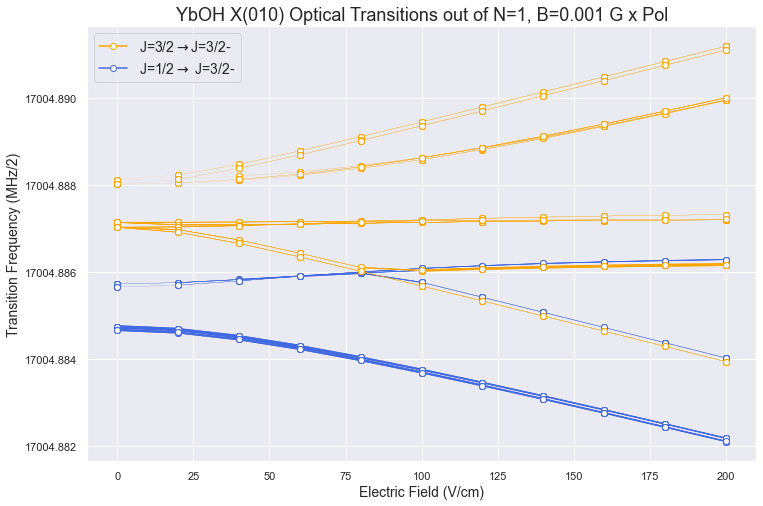

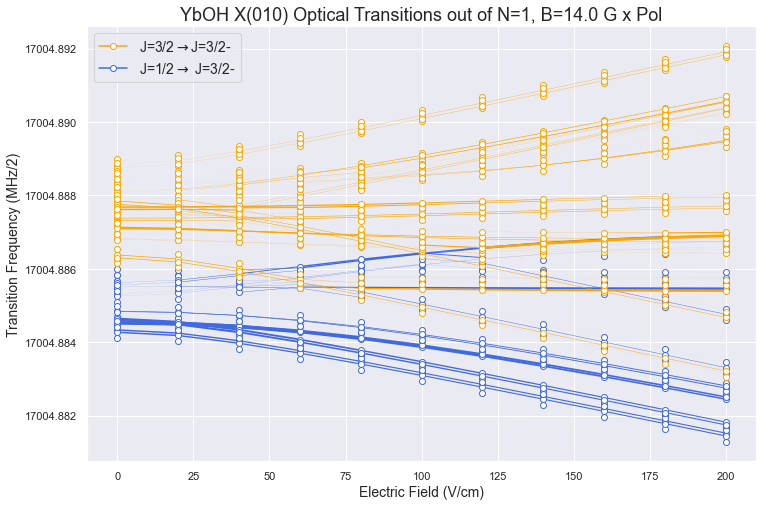

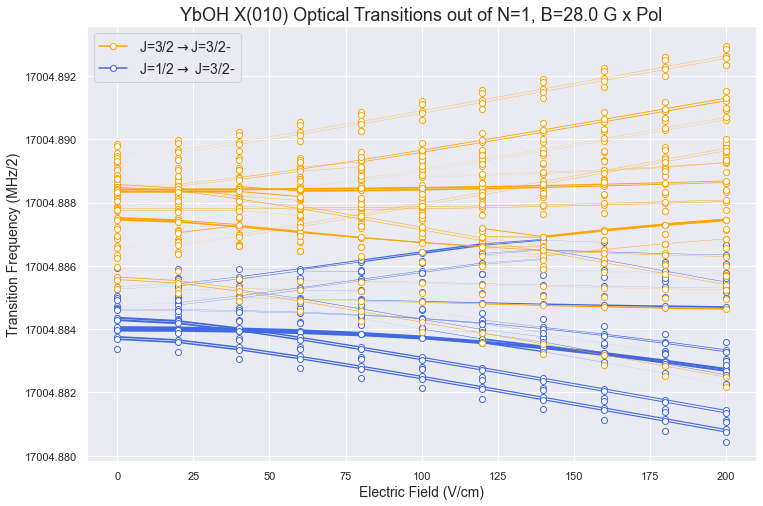

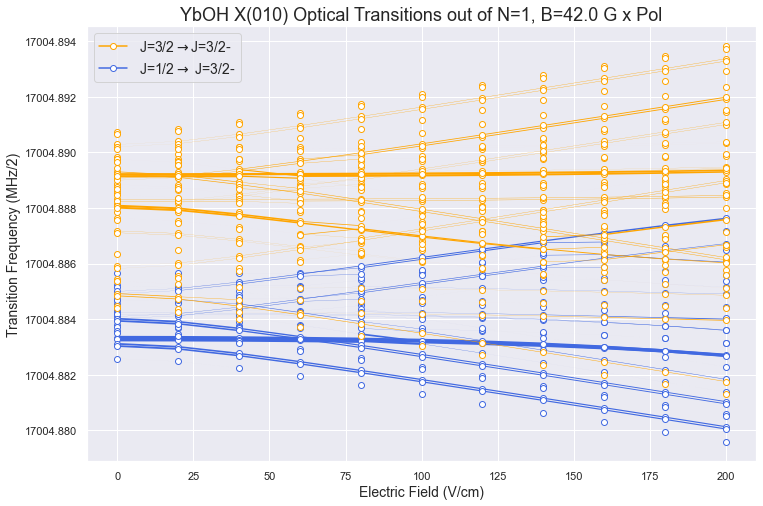

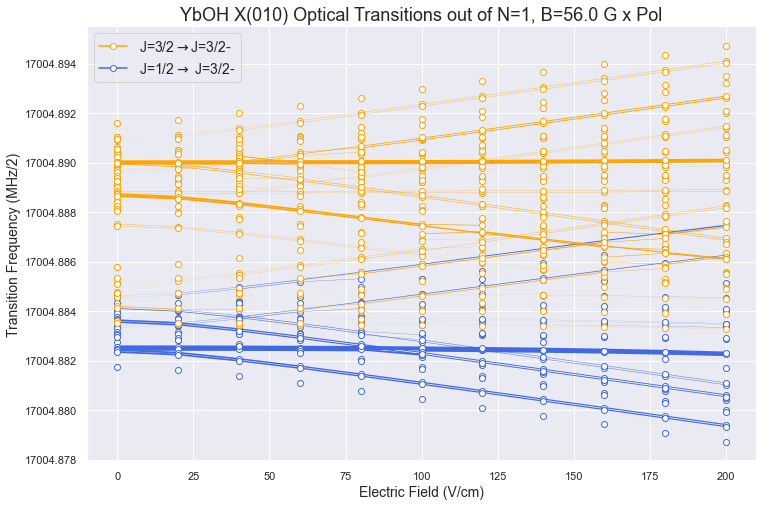

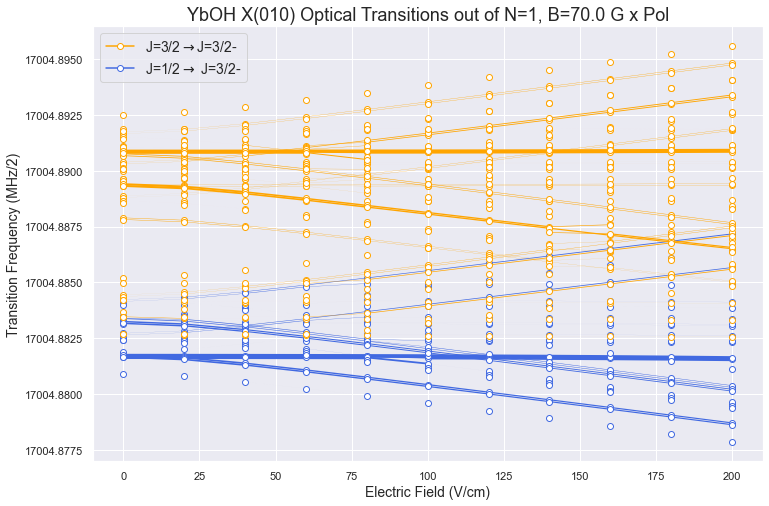

In [31]:
pol = 'x'
print_bool = False
for B in Bscan:
    g.eigensystem(0,1e-2)
    e.eigensystem(0,1e-2)
    g1 = g.select_q({'N':1,'J':1.5})
    e1 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
    g2 = g.select_q({'N':1, 'J':0.5})
    e2 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
    g3 = g.select_q({'N':1})
    e3 = e.select_q({'J':[1.5],'P':[1/2,-1/2]},parity='-')
#     g4 = g.select_q({'N':1,'J':[1.5]})
#     e4 = e.select_q({'N':1,'J':[1.5]})
    fig,a = plt.subplots(figsize=(12,8))
    TDM_E,dE_E,t_str_E = Trans_B[B][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_E(Escan,TDM_E,dE_E,g_idx=g2,Debye=D,e_idx=e2,linescale=0.1,figure=fig,color='royalblue',marker='o',mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g1,Debye=D,e_idx=e1,linescale=0.1,figure=fig,color='orange',marker='o',mfc='white')
#     plot_E(Escan,TDM_E,dE_E,g_idx=g4,Debye=D,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    colors = ['orange','royalblue','hotpink']
    mark = ['o','o','o']
    mf = ['white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'J=3/2$\rightarrow $J=3/2-',r'J=1/2$\rightarrow$ J=3/2-']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('YbOH X(010) Optical Transitions out of N=1, B={} G {} Pol'.format(B,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('B = {} G'.format(B))
        table = print_table_E(Escan,TDM_E,dE_E,t_str_E,g3,e3,thresh = 1e-2,cut=True,dipole=pol)

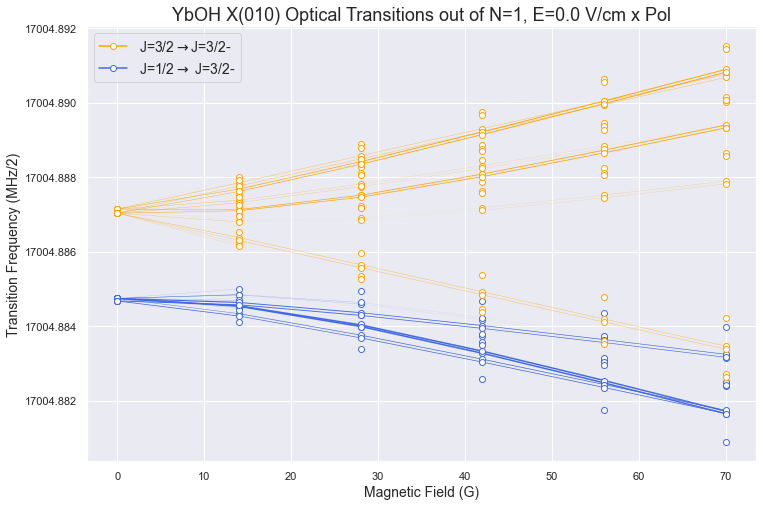

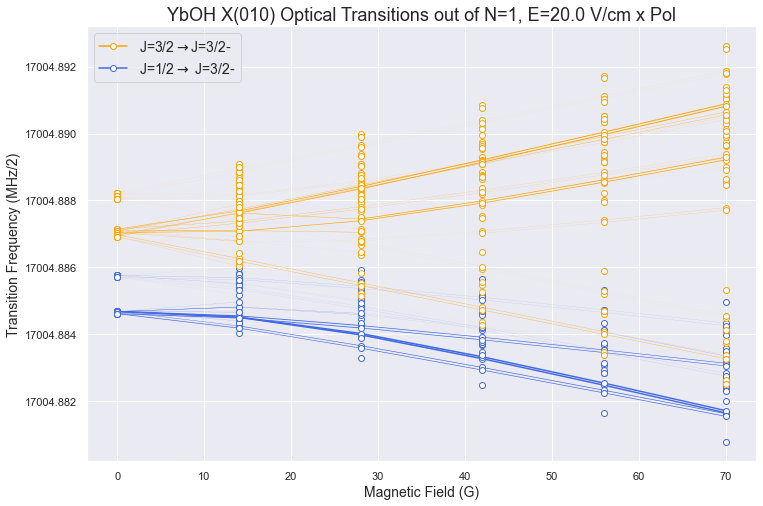

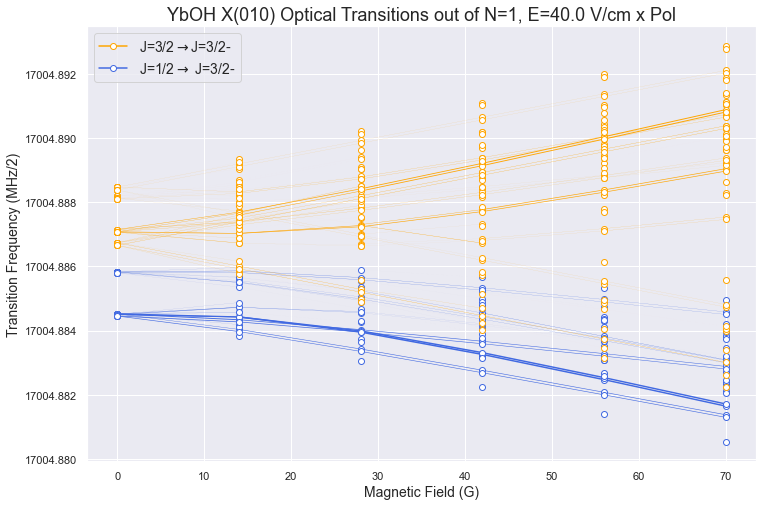

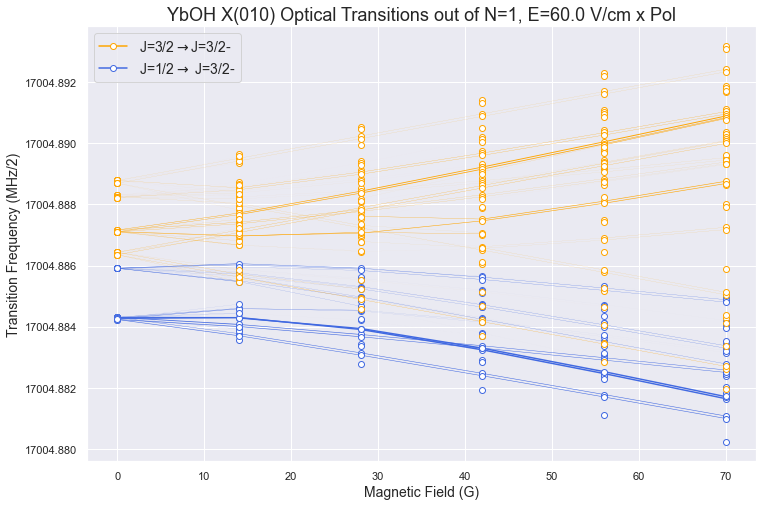

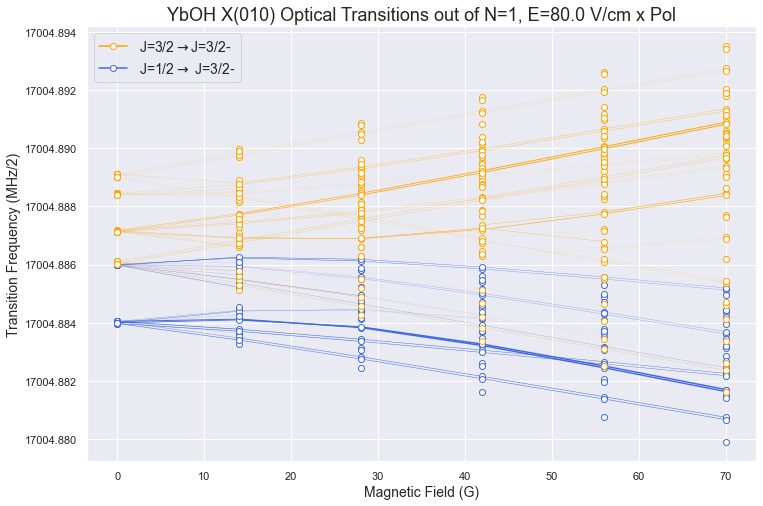

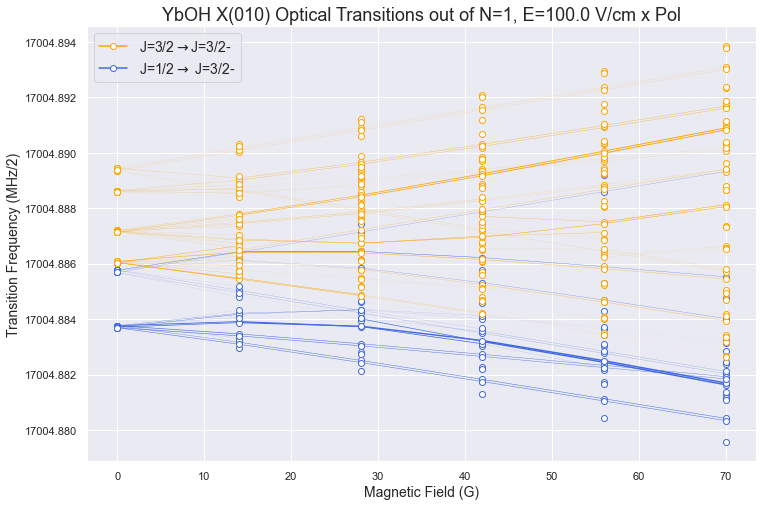

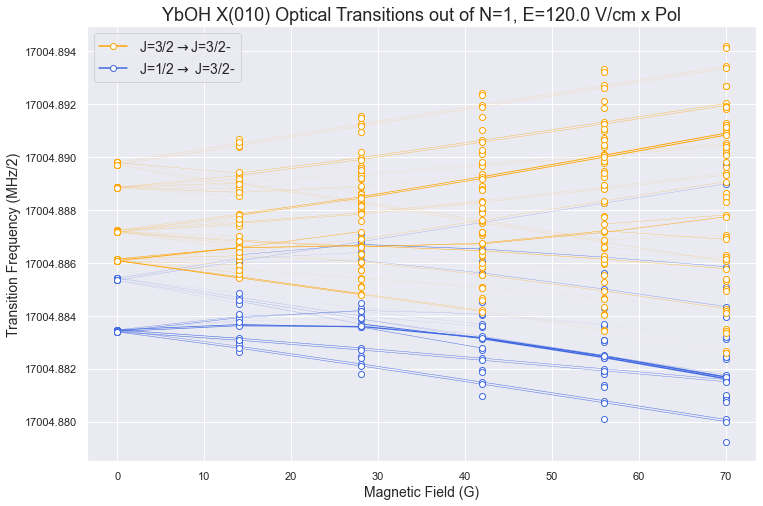

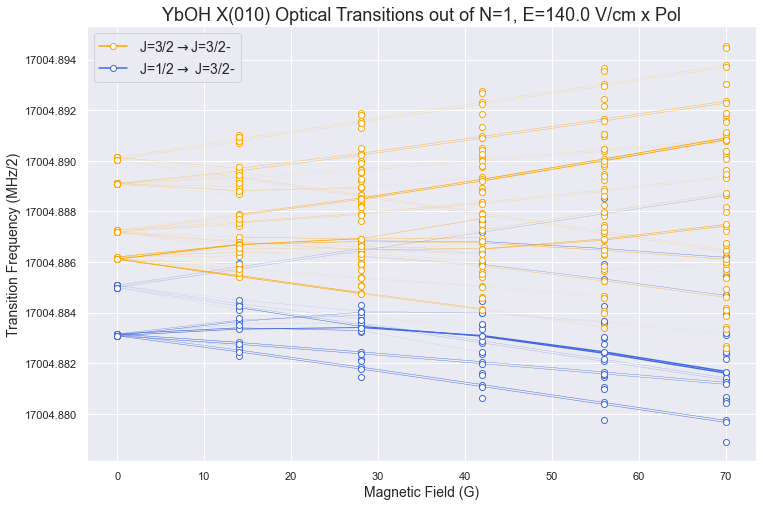

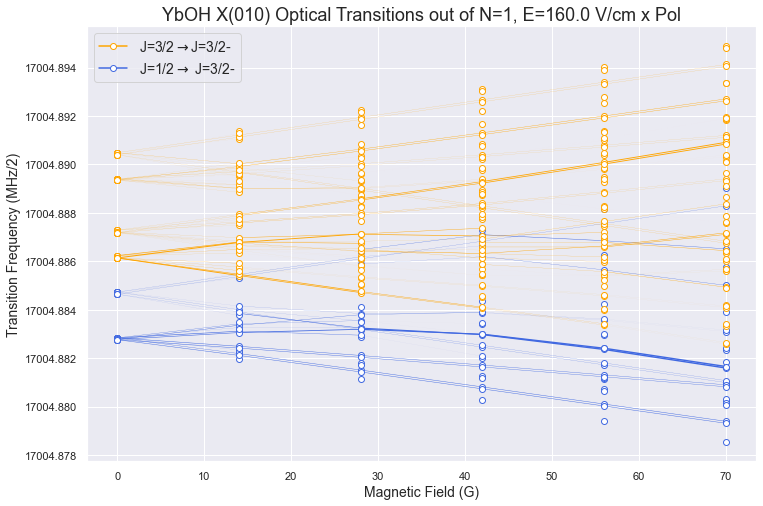

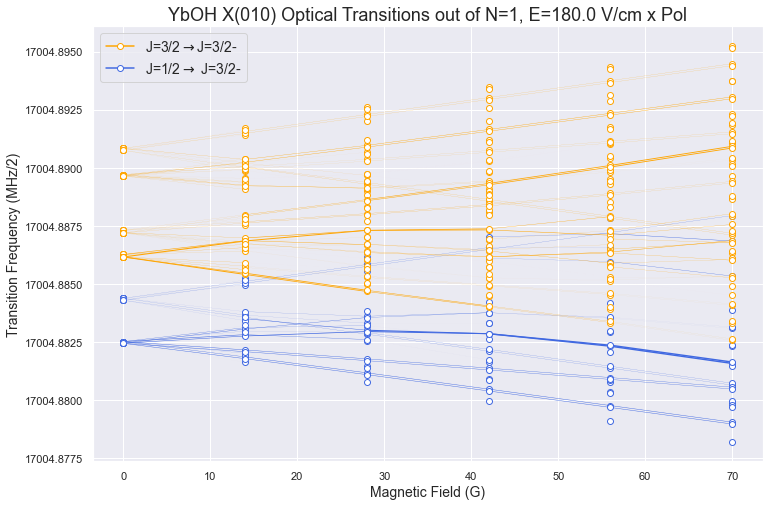

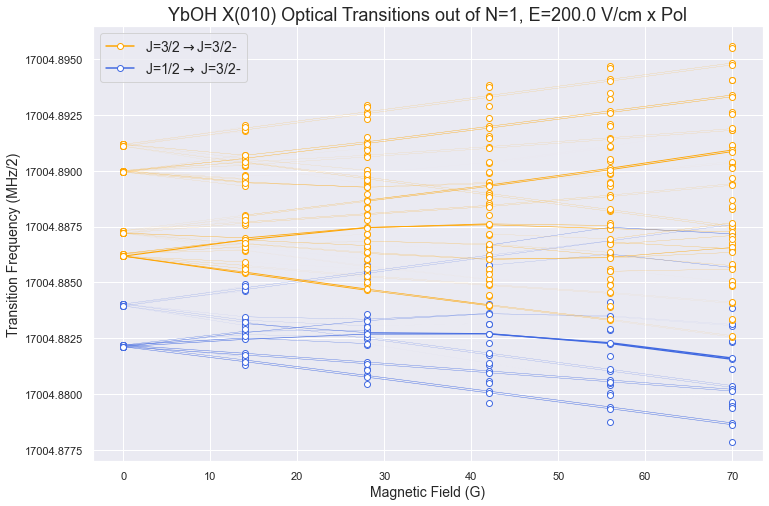

In [33]:
pol = 'x'
print_bool = False
for E in Escan:
    g.eigensystem(0,1e-2)
    e.eigensystem(0,1e-2)
    g1 = g.select_q({'N':1,'J':[1.5]})
    e1 = e.select_q({'J':[1.5],'P':[-1/2,1/2]},parity='-')
    g2 = g.select_q({'N':1,'J':[0.5]})
    e2 = e.select_q({'J':[1.5],'P':[-1/2,1/2]},parity='-')
    g3 = g.select_q({'N':1,'J':[0.5,1.5]})
    e3 = e.select_q({'J':[1.5],'P':[-1/2,1/2]},parity='-')
#     g4 = g.select_q({'N':1,'J':[1.5]})
#     e4 = e.select_q({'N':1,'J':[1.5]})
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,Debye=D,e_idx=e2,linescale=0.2,figure=fig,color='royalblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,Debye=D,e_idx=e1,linescale=0.2,figure=fig,color='orange',marker='o',mfc='white')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g4,Debye=D,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    colors = ['orange','royalblue','hotpink']
    mark = ['o','o','o']
    mf = ['white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'J=3/2$\rightarrow $J=3/2-',r'J=1/2$\rightarrow$ J=3/2-']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('YbOH X(010) Optical Transitions out of N=1, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 1e-1,cut=True,dipole=pol)

Using E (V/cm) field of 100
40.04042799999999
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


Text(0.5, 0, 'Frequency (cm-1)')

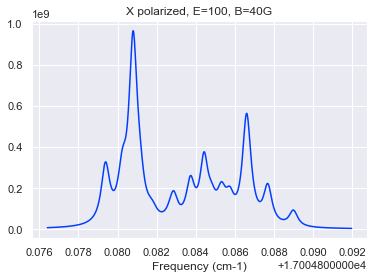

In [48]:
D=5.24
origin = 17998.5875-319.908907
cm=True
E0 =100
B0 = 40
pol = 'x'
if g.E0 != E0 and g.B0 != B0:
    g.ZeemanMap(Bz,E0,plot=False)
    e.ZeemanMap(Bz,E0,plot=False)
info_EB = transitions_B(g,e,[B0],dipole=pol,Debye=D,origin=origin,cm=cm,scale=1.5)
TDM,dE,t_str = info_EB
gidx = g.select_q({'N':1,})
eidx = e.select_q({'J':1.5,'P':[1/2,-1/2]},parity='-')
lines,lor,tdms = simulate_spectra_E(np.square(TDM),dE,gidx,eidx,[E0],E0=E0,g=15/(29979.2458),cut=True,thresh = 1e-6);
plt.title('X polarized, E={}, B={}G'.format(E0,B0))
plt.xlabel('Frequency (cm-1)')

Using E (V/cm) field of 240
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


Text(0.5, 0, 'Frequency (cm-1)')

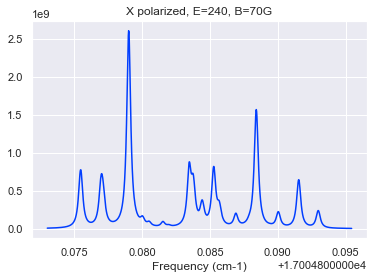

In [43]:
D=5.24
origin = 17998.5875-319.908907
cm=True
E0 =240
B0 = 70
pol = 'x'
g.ZeemanMap(Bz,E0,plot=False)
e.ZeemanMap(Bz,E0,plot=False)
info_EB = transitions_B(g,e,[B0],dipole=pol,Debye=D,origin=origin,cm=cm,scale=2)
TDM,dE,t_str = info_EB
gidx = g.select_q({'N':1,})
eidx = e.select_q({'J':1.5,'P':[1/2,-1/2]},parity='-')
lines,lor,tdms = simulate_spectra_E(np.square(TDM),dE,gidx,eidx,[E0],E0=E0,g=10/(29979.2458),cut=True,thresh = 1e-6);
plt.title('X polarized, E={}, B={}G'.format(E0,B0))
plt.xlabel('Frequency (cm-1)')

Using E (V/cm) field of 200
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


Text(0.5, 0, 'Frequency (cm-1)')

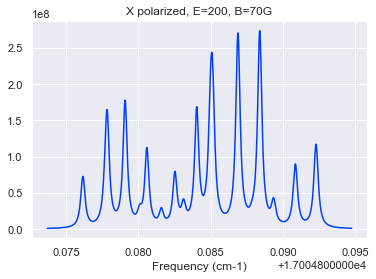

In [54]:
D=5.24
origin = 17998.5875-319.908907
cm=True
E0 =200
B0 = 70
pol = 'x'
g.ZeemanMap(Bz,E0,plot=False)
e.ZeemanMap(Bz,E0,plot=False)
info_EB = transitions_B(g,e,[B0],dipole=pol,Debye=D,origin=origin,cm=cm,scale=-0.5)
TDM,dE,t_str = info_EB
gidx = g.select_q({'N':1,})
eidx = e.select_q({'J':1.5,'P':[1/2,-1/2]},parity='-')
lines,lor,tdms = simulate_spectra_E(np.square(TDM),dE,gidx,eidx,[E0],E0=E0,g=10/(29979.2458),cut=True,thresh = 1e-6);
plt.title('X polarized, E={}, B={}G'.format(E0,B0))
plt.xlabel('Frequency (cm-1)')

In [50]:
list(zip(lines,np.round(tdms,2)))

[(17004.885625565592, 0.0),
 (17004.885625573635, 0.0),
 (17004.8856255817, 0.0),
 (17004.88562558978, 0.0),
 (17004.88562559788, 0.0),
 (17004.885626412288, 0.0),
 (17004.885626425752, 0.0),
 (17004.885626439194, 0.0),
 (17004.88562552802, 0.0),
 (17004.885625536062, 0.0),
 (17004.885625544128, 0.0),
 (17004.885625552208, 0.0),
 (17004.885625560306, 0.0),
 (17004.88562637472, 0.0),
 (17004.88562638818, 0.0),
 (17004.885626401625, 0.0),
 (17004.885625490446, 0.0),
 (17004.88562549849, 0.0),
 (17004.885625506555, 0.0),
 (17004.885625514635, 0.0),
 (17004.885625522733, 0.0),
 (17004.885626337145, 0.0),
 (17004.885626350606, 0.0),
 (17004.885626364052, 0.0),
 (17004.885513007244, 0.0),
 (17004.885513015288, 0.0),
 (17004.885513023353, 0.0),
 (17004.885513031433, 0.0),
 (17004.88551303953, 0.0),
 (17004.885513853944, 0.0),
 (17004.885513867404, 0.0),
 (17004.88551388085, 0.0),
 (17004.885512983874, 0.0),
 (17004.885512991917, 0.0),
 (17004.885512999983, 0.0),
 (17004.885513008063, 0.0),
 (

In [13]:
g.H_symbolic

Matrix([
[                                   7376.1145,                                      14.7525,                                                                0,                                                                0,        -0.4670780207227*B_z + 0.35406644*E_z,                                            0,                                                               0,                                                               0,                                                                0,                                                                0, -1.32109614318485*B_z + 0.25036278071458*E_z,                                            0,                                                               0,                                                               0,                                                  0,                                                  0,                                                   0,                                  

In [11]:
tdms

[6.064171141636983e-46,
 4.226999171544122e-46,
 4.948252343296877e-37,
 1.558987355456383e-47,
 6.278296729019124e-35,
 1.59301095110898e-49,
 4.500087965536726e-36,
 2.359416157352145e-49,
 9.321292124790326e-45,
 2.90200372281242e-36,
 1.9605758764649535e-50,
 8.311397339070044e-37,
 2.456003334351353e-46,
 1.5990388439794054e-35,
 0.0,
 1.168736322396162e-34,
 3.5170303135490674e-36,
 5.922701250239668e-46,
 1.0147520952985284e-36,
 8.578835703445444e-52,
 1.6061952003389555e-47,
 1.3505102389307162e-49,
 9.48097237481962e-35,
 2.390260726632192e-51,
 7.256189889118569e-51,
 7.027152435803517e-50,
 5.797239755831444e-51,
 2.2002307746557107e-35,
 5.002438099434919e-46,
 1.3024009707693615e-47,
 0.0,
 4.0616491538069627e-35,
 7.116523237779351e-46,
 3.108991877697639e-46,
 1.5347069910063884e-34,
 2.4515849871683403e-47,
 4.830166785395953e-35,
 1.5545528729962804e-48,
 7.204856025909445e-36,
 1.3778391761332771e-49,
 5.668411362367823e-45,
 1.4290467661792785e-36,
 2.05872161998158

In [2]:
list(zip(lines,np.round(tdms,4)))

NameError: name 'lines' is not defined

In [72]:
x010 = MoleculeLevels.initialize_state('YbOH','174','X010',[1,2,3],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])

In [93]:
a000 = MoleculeLevels.initialize_state('YbOH','174','A000',[1,2,3],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])

In [104]:
vals,vecs = x010.eigensystem(0,70)

In [105]:
arian = vals/(29979.2458)+17998.5875*0 + 319.908907
arian

array([320.148744361, 320.148828215, 320.149367315, 320.149441671,
       320.149728534, 320.149812389, 320.150105544, 320.1501824  ,
       320.15035149 , 320.150425846, 320.151089722, 320.151166577,
       320.155290038, 320.155371815, 320.156274211, 320.156283024,
       320.156349805, 320.156355988, 320.157015762, 320.157096457,
       320.157267201, 320.157333982, 320.157999942, 320.158080636,
       321.123647052, 321.123724084, 321.124338139, 321.12441076 ,
       321.125123373, 321.12518938 , 321.126055812, 321.126111994,
       321.126599586, 321.126676618, 321.127272319, 321.127290672,
       321.127313054, 321.127363293, 321.128075907, 321.128141914,
       321.129008346, 321.129064528, 321.130192451, 321.130224853,
       321.130265588, 321.130267693, 321.133108022, 321.133144985,
       321.133152625, 321.133220226, 321.134311032, 321.134367074,
       321.135235521, 321.135297554, 321.136015963, 321.136060557,
       321.136080905, 321.13610516 , 321.137263567, 321.137319

In [106]:
yuiki = np.array([320.1487449054689,
 320.14882867433334,
 320.1493677915599,
 320.14944215413476,
 320.14972907817537,
 320.1498128468788,
 320.1501059880212,
 320.15018289508924,
 320.15035196566134,
 320.1504263282467,
 320.15109016416596,
 320.15116707131,
 320.1552895986822,
 320.1553712932073,
 320.1562737712242,
 320.15628256414885,
 320.1563493733945,
 320.1563554655924,
 320.15701528768074,
 320.15709601958105,
 320.1572667404665,
 320.157333549744,
 320.15799946610764,
 320.1580801980822,
 321.12364762182864,
 321.1237246038431,
 321.1243386400533,
 321.1244112442359,
 321.1251238046136,
 321.125189818375,
 321.12605616884974,
 321.1261123692014,
 321.1266001531445,
 321.1266771350238,
 321.1272725920058,
 321.1272911713893,
 321.127313336039,
 321.1273637754876,
 321.12807633597487,
 321.1281423497074,
 321.1290087002457,
 321.1290649006297,
 321.1301920385976,
 321.1302251234593,
 321.13026586759264,
 321.1302672314525,
 321.1331078288354,
 321.13314456977446,
 321.13315249521617,
 321.133219762498,
 321.13431076319864,
 321.1343668409232,
 321.1352352063056,
 321.13529722894185,
 321.1360156185607,
 321.1360603609972,
 321.1360804925639,
 321.1361050272506,
 321.13726329548416,
 321.13731937318124,
 321.1381877386899,
 321.13824976139455,
 321.1389681510318,
 321.1390330251966,
 322.5980065435203,
 322.5980515177244,
 322.5989507499722,
 322.5989768306349,
 322.59989475794436,
 322.59990233014406,
 322.60082800550344,
 322.60083857932693,
 322.6017538469585,
 322.6017822248682,
 322.6026798456246,
 322.6027257043227,
 322.60391161456585,
 322.60395658890155,
 322.60485582107464,
 322.6048819018104,
 322.6057998291021,
 322.60580740131917,
 322.60673307667935,
 322.60674365053853,
 322.6076589181363,
 322.6076872961324,
 322.6085849168053,
 322.6086307756382]
)

In [107]:
arian = arian[:len(yuiki)]

In [108]:
arian-yuiki

array([-0.000000544, -0.000000459, -0.000000477, -0.000000483,
       -0.000000544, -0.000000458, -0.000000444, -0.000000495,
       -0.000000476, -0.000000482, -0.000000443, -0.000000494,
        0.000000439,  0.000000521,  0.00000044 ,  0.00000046 ,
        0.000000431,  0.000000522,  0.000000475,  0.000000437,
        0.000000461,  0.000000432,  0.000000476,  0.000000438,
       -0.00000057 , -0.000000519, -0.000000501, -0.000000485,
       -0.000000431, -0.000000439, -0.000000357, -0.000000376,
       -0.000000567, -0.000000517, -0.000000273, -0.000000499,
       -0.000000282, -0.000000482, -0.000000429, -0.000000436,
       -0.000000354, -0.000000373,  0.000000413, -0.00000027 ,
       -0.00000028 ,  0.000000461,  0.000000193,  0.000000415,
        0.00000013 ,  0.000000464,  0.000000269,  0.000000233,
        0.000000315,  0.000000325,  0.000000344,  0.000000196,
        0.000000412,  0.000000133,  0.000000271,  0.000000236,
        0.000000317,  0.000000328,  0.000000347,  0.000

In [20]:
yuiki_dict=[{'E': 320.1519874763684, 'N': 1, 'J': 1.5, 'P': 1.5, 'F': 1.0, 'Parity': -1},
 {'E': 320.1520999838366, 'N': 1, 'J': 1.5, 'P': 1.5, 'F': 2.0, 'Parity': -1},
 {'E': 320.15297164904666, 'N': 1, 'J': 1.5, 'P': 1.5, 'F': 1.0, 'Parity': 1},
 {'E': 320.1530841563027, 'N': 1, 'J': 1.5, 'P': 1.5, 'F': 2.0, 'Parity': 1},
 {'E': 320.1543861935952, 'N': 2, 'J': 0.5, 'P': 0.5, 'F': 1.0, 'Parity': -1},
 {'E': 320.15445561666667, 'N': 2, 'J': 0.5, 'P': 0.5, 'F': 0.0, 'Parity': -1},
 {'E': 320.1553703735929, 'N': 2, 'J': 0.5, 'P': 0.5, 'F': 1.0, 'Parity': 1},
 {'E': 320.15543979666666, 'N': 2, 'J': 0.5, 'P': 0.5, 'F': 0.0, 'Parity': 1},
 {'E': 321.126903550508, 'N': 3, 'J': 2.5, 'P': 1.5, 'F': 2.0, 'Parity': 1},
 {'E': 321.1269959175537, 'N': 3, 'J': 2.5, 'P': 1.5, 'F': 3.0, 'Parity': 1},
 {'E': 321.12985608178155, 'N': 3, 'J': 2.5, 'P': 1.5, 'F': 2.0, 'Parity': -1},
 {'E': 321.12994844866734, 'N': 3, 'J': 2.5, 'P': 1.5, 'F': 3.0, 'Parity': -1},
 {'E': 321.13344633701143, 'N': 4, 'J': 1.5, 'P': 0.5, 'F': 2.0, 'Parity': 1},
 {'E': 321.1334983606937, 'N': 4, 'J': 1.5, 'P': 0.5, 'F': 1.0, 'Parity': 1},
 {'E': 321.1363988694775, 'N': 4, 'J': 1.5, 'P': 0.5, 'F': 2.0, 'Parity': -1},
 {'E': 321.1364508933697, 'N': 4, 'J': 1.5, 'P': 0.5, 'F': 1.0, 'Parity': -1}]
yuiki = np.array([dic['E'] for dic in yuiki_dict])

In [29]:
yuiki_dict = [{'E': 17323.6215181406, 'J': 0.5, 'P': 0.5, 'F': 1.0, 'Parity': -1},
 {'E': 17323.621520250603, 'J': 0.5, 'P': 0.5, 'F': 0.0, 'Parity': -1},
 {'E': 17324.05958434058, 'J': 0.5, 'P': 0.5, 'F': 1.0, 'Parity': 1},
 {'E': 17324.059586450603, 'J': 0.5, 'P': 0.5, 'F': 0.0, 'Parity': 1},
 {'E': 17324.16150616901, 'J': 1.5, 'P': 0.5, 'F': 2.0, 'Parity': 1},
 {'E': 17324.161507012934, 'J': 1.5, 'P': 0.5, 'F': 1.0, 'Parity': 1},
 {'E': 17325.037615680852, 'J': 1.5, 'P': 0.5, 'F': 2.0, 'Parity': -1},
 {'E': 17325.03761652477, 'J': 1.5, 'P': 0.5, 'F': 1.0, 'Parity': -1},
 {'E': 17325.207514011483, 'J': 2.5, 'P': 0.5, 'F': 3.0, 'Parity': -1},
 {'E': 17325.2075145539, 'J': 2.5, 'P': 0.5, 'F': 2.0, 'Parity': -1},
 {'E': 17326.521621058928, 'J': 2.5, 'P': 0.5, 'F': 3.0, 'Parity': 1},
 {'E': 17326.521621601343, 'J': 2.5, 'P': 0.5, 'F': 2.0, 'Parity': 1},
 {'E': 17326.75953928891, 'J': 3.5, 'P': 0.5, 'F': 4.0, 'Parity': 1},
 {'E': 17326.75953969059, 'J': 3.5, 'P': 0.5, 'F': 3.0, 'Parity': 1},
 {'E': 17328.511575207624, 'J': 3.5, 'P': 0.5, 'F': 4.0, 'Parity': -1},
 {'E': 17328.5115756093, 'J': 3.5, 'P': 0.5, 'F': 3.0, 'Parity': -1},
 {'E': 17328.81757400227, 'J': 4.5, 'P': 0.5, 'F': 5.0, 'Parity': -1},
 {'E': 17328.817574321674, 'J': 4.5, 'P': 0.5, 'F': 4.0, 'Parity': -1},
 {'E': 17331.007447239914, 'J': 4.5, 'P': 0.5, 'F': 5.0, 'Parity': 1},
 {'E': 17331.00744755931, 'J': 4.5, 'P': 0.5, 'F': 4.0, 'Parity': 1},
 {'E': 18674.093743102694, 'J': 1.5, 'P': 1.5, 'F': 1.0, 'Parity': 1},
 {'E': 18674.093743190835, 'J': 1.5, 'P': 1.5, 'F': 1.0, 'Parity': -1},
 {'E': 18674.093745634593, 'J': 1.5, 'P': 1.5, 'F': 2.0, 'Parity': 1},
 {'E': 18674.093745722734, 'J': 1.5, 'P': 1.5, 'F': 2.0, 'Parity': -1},
 {'E': 18675.35922925572, 'J': 2.5, 'P': 1.5, 'F': 2.0, 'Parity': -1},
 {'E': 18675.359229608264, 'J': 2.5, 'P': 1.5, 'F': 2.0, 'Parity': 1},
 {'E': 18675.35923088326, 'J': 2.5, 'P': 1.5, 'F': 3.0, 'Parity': -1},
 {'E': 18675.359231235805, 'J': 2.5, 'P': 1.5, 'F': 3.0, 'Parity': 1},
 {'E': 18677.13088968148, 'J': 3.5, 'P': 1.5, 'F': 3.0, 'Parity': 1},
 {'E': 18677.130890562763, 'J': 3.5, 'P': 1.5, 'F': 3.0, 'Parity': -1},
 {'E': 18677.130890886958, 'J': 3.5, 'P': 1.5, 'F': 4.0, 'Parity': 1},
 {'E': 18677.13089176824, 'J': 3.5, 'P': 1.5, 'F': 4.0, 'Parity': -1},
 {'E': 18679.40870508287, 'J': 4.5, 'P': 1.5, 'F': 4.0, 'Parity': -1},
 {'E': 18679.40870604166, 'J': 4.5, 'P': 1.5, 'F': 5.0, 'Parity': -1},
 {'E': 18679.408706845228, 'J': 4.5, 'P': 1.5, 'F': 4.0, 'Parity': 1},
 {'E': 18679.408707804017, 'J': 4.5, 'P': 1.5, 'F': 5.0, 'Parity': 1}
]
yuiki = np.array([dic['E'] for dic in yuiki_dict])


In [30]:
a000 = MoleculeLevels.initialize_state('YbOH','174','A000',[1,2,3,4,5],M_values = 'none',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])

Cannot construct decoupled basis without M values


In [22]:
x010 = MoleculeLevels.initialize_state('YbOH','174','X010',[1,2],M_values = 'none',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])

Cannot construct decoupled basis without M values
Cannot construct decoupled basis without M values
Cannot construct decoupled basis without M values


In [34]:
arian = (a000.evals0[:32])/29979.2458

In [40]:
arian + 17998.5875

array([17323.621518507, 17323.621520617, 17324.059584434, 17324.059586544,
       17324.161505859, 17324.161506703, 17325.037614829, 17325.037615673,
       17325.20751248 , 17325.207513023, 17326.521618725, 17326.521619268,
       17326.75953599 , 17326.759536392, 17328.511570859, 17328.511571261,
       17328.817568388, 17328.817568707, 17331.007440345, 17331.007440664,
       17331.381596098, 17331.381596364, 17334.009190724, 17334.00919099 ,
       18674.093742061, 18674.093742149, 18674.093744593, 18674.093744681,
       18675.359226862, 18675.359227214, 18675.359228489, 18675.359228842])

In [23]:
arian = (x010.evals0)/29979.2458

In [37]:
(arian - arian.min()) - (yuiki - yuiki.min())

array([    0.         ,     0.         ,    -0.000000273,    -0.000000273,
          -0.000000677,    -0.000000676,    -0.000001218,    -0.000001218,
          -0.000001898,    -0.000001898,    -0.0000027  ,    -0.0000027  ,
          -0.000003665,    -0.000003665,    -0.000004715,    -0.000004715,
          -0.000005981,    -0.000005981,    -0.000007261,    -0.000007261,
       -1342.712147371, -1342.712147194, -1340.084555277, -1340.0845551  ,
          -1.265487561,    -1.265487825,    -1.265486657,    -1.265486921,
          -1.771663186,    -1.771663715,    -1.771662764,    -1.771663293])

In [26]:
arian[0]

0.2430803987877507

In [28]:
yuiki[0]-arian[0]

319.90890707758064

In [19]:
dE[0,gidx,:]

array([[17003.46946, 17003.46946, 17003.46946, 17003.46946, 17003.46847,
        17003.46847, 17003.46847, 17003.46847, 17003.46712, 17003.46712,
        17003.46613, 17003.46613],
       [17003.46946, 17003.46946, 17003.46946, 17003.46946, 17003.46847,
        17003.46847, 17003.46847, 17003.46847, 17003.46712, 17003.46712,
        17003.46613, 17003.46613],
       [17003.53594, 17003.53594, 17003.53594, 17003.53594, 17003.53496,
        17003.53496, 17003.53496, 17003.53496, 17003.5336 , 17003.5336 ,
        17003.53262, 17003.53262],
       [17003.53594, 17003.53594, 17003.53594, 17003.53594, 17003.53496,
        17003.53496, 17003.53496, 17003.53496, 17003.5336 , 17003.5336 ,
        17003.53262, 17003.53262],
       [17003.53594, 17003.53594, 17003.53594, 17003.53594, 17003.53496,
        17003.53496, 17003.53496, 17003.53496, 17003.5336 , 17003.5336 ,
        17003.53262, 17003.53262],
       [17003.53594, 17003.53594, 17003.53594, 17003.53594, 17003.53496,
        17003.53496, 1

In [79]:
g.select_q({'J':0.5},parity='+')

array([20, 21, 22, 23])

In [120]:
v = g.evecs_E[-1][20]
P=g.Parity_mat

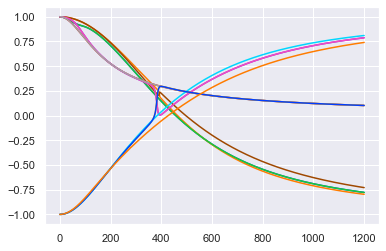

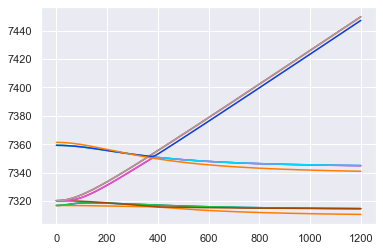

In [162]:
v = g.evecs_E.T[23]
parity_E = np.zeros((len(g.evals0),len(Ez)))
for i in range(len(g.evals0)):
    for j in range(len(Ez)):
        v=g.evecs_E[j,i]
        parity_E[i,j] = v@P@v
for pval in parity_E[8:20,:]:
    plt.plot(pval)
plt.figure()
for trace in g.evals_E.T[8:20]:
    plt.plot(trace);

In [132]:
parity_E.shape

(24, 1201)

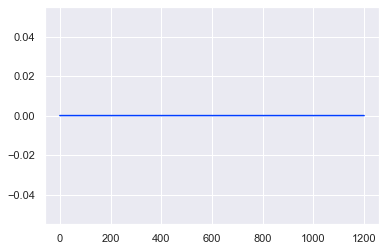

In [118]:
plt.plot(parity_E)

In [40]:
np.array(X010.parities)[X010.select_q({'N':1},parity='+')]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
X010.evals0[X010.select_q({'N':1},parity='+')]

array([7316.81479, 7316.92707, 7317.04005, 7320.16263, 7320.23306,
       7320.30326, 7320.37321, 7320.44287, 7388.74287, 7388.78421,
       7388.82802, 7390.86796])

In [33]:
X010.evecs0[X010.select_q({'N':1},parity='+')].shape

(12, 24)

In [22]:
Bz = np.linspace(1e-3,50,1000)
Ez = np.linspace(0,1000,1000)

Text(0.5, 1.0, 'G=3 Stark Shifts')

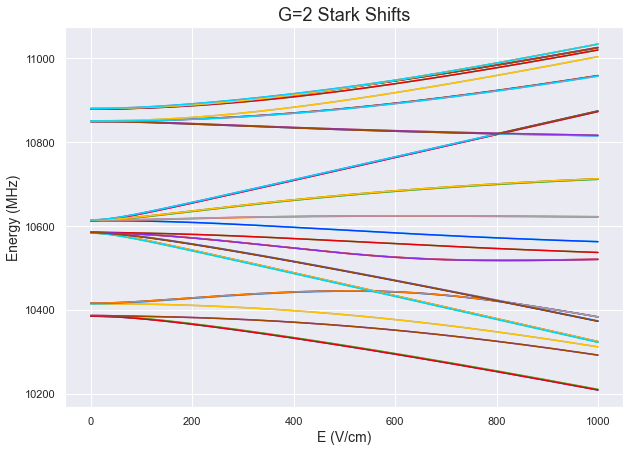

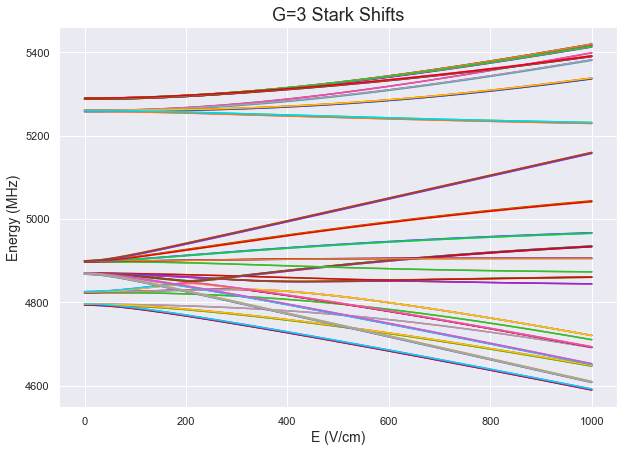

In [23]:
X010.StarkMap(Ez,1e-3,plot=True,idx = X010.select_q({'G':2}))
plt.title('G=2 Stark Shifts',fontsize=18)
X010.StarkMap(Ez,1e-3,plot=True,idx = X010.select_q({'G':3}))
plt.title('G=3 Stark Shifts',fontsize=18)

Text(0.5, 1.0, 'G=0 Zeeman Shifts')

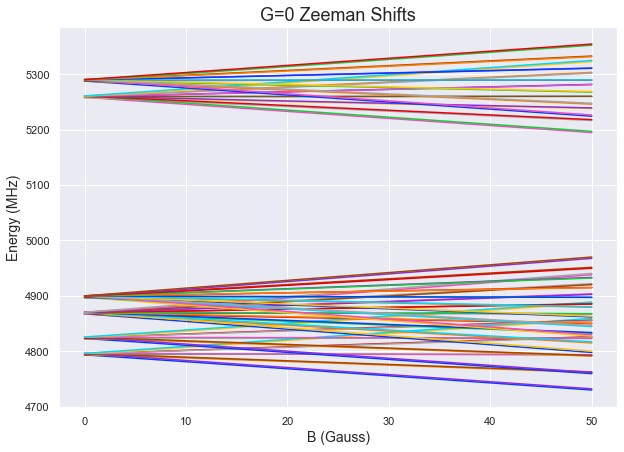

In [24]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'G':3}))
plt.title('G=0 Zeeman Shifts',fontsize=18)

Text(0.5, 1.0, 'G=1 Zeeman Shifts')

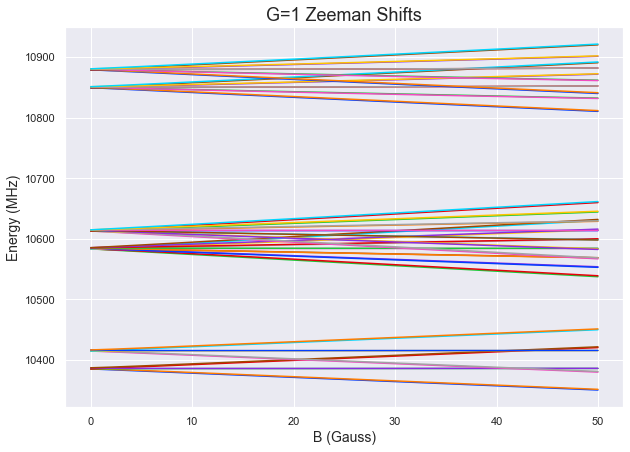

In [25]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'G':2}))
plt.title('G=1 Zeeman Shifts',fontsize=18)

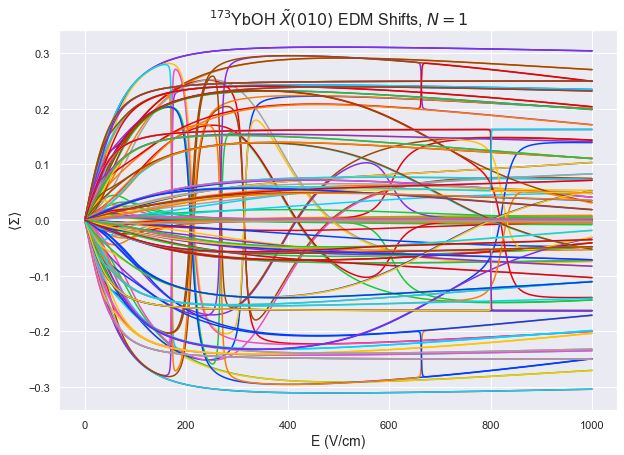

In [41]:
X010.PTV_Map('EDM',E_or_B='E',plot=True)

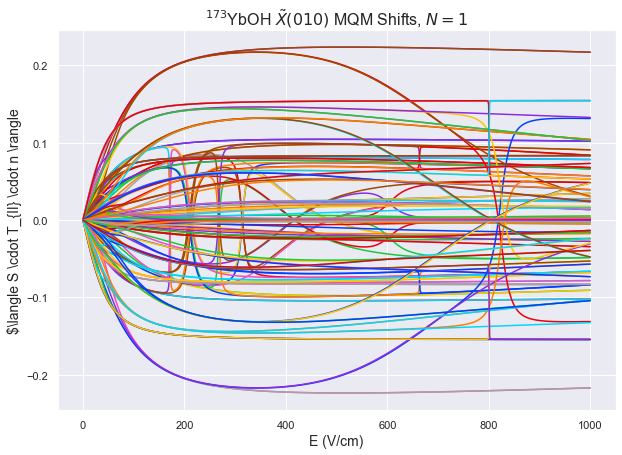

In [35]:
X010.PTV_Map('MQM',E_or_B='E',plot=True)

In [28]:
X010.g_eff_Map(step=1e-6);

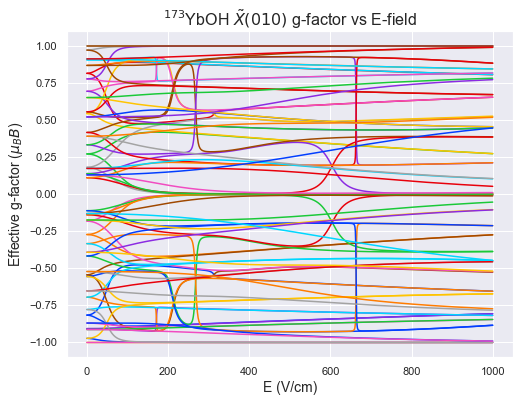

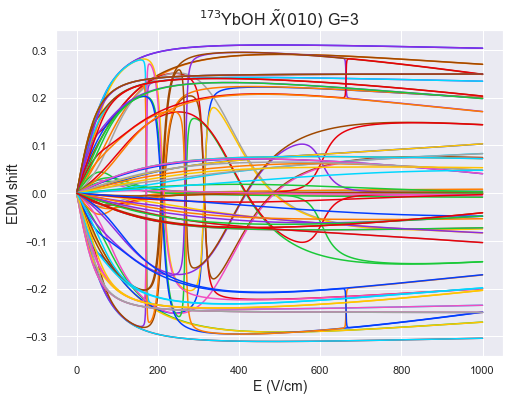

In [44]:
qd={'G':3}
plt.figure(figsize=(8,6))
for i in X010.select_q(qd):#range(len(X010_174.g_eff_E.T)):
#     if abs(X010.PTV_E.T[i]).mean()<0.05:
#         continue
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in X010.select_q(qd):#range(len(X010_174.PTV_E.T)):
#     if abs(X010.PTV_E.T[i]).mean()<0.05:
#         continue
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str+' G={}'.format(qd['G'][0]),fontsize=16);

Text(0.5, 1.0, '$^{173}$YbOH $\\tilde{X}(010)$ MQM Shifts, G=3, E=300 V/cm')

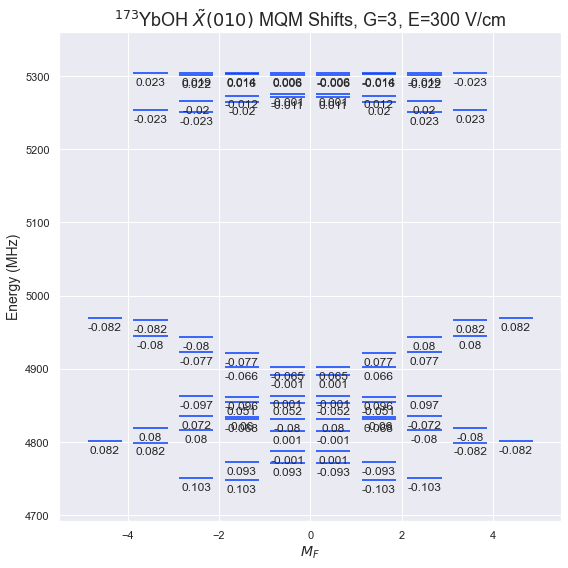

In [62]:
X010.display_PTV(300,1e-4,'MQM',idx=X010.select_q({'G':3}),round=3)
# plt.ylim(10300,10500)
plt.xlim(-5.5,5.5)
plt.title(X010.state_str + ' MQM Shifts, G=3, E=300 V/cm',fontsize=18)

(-2.5, 2.5)

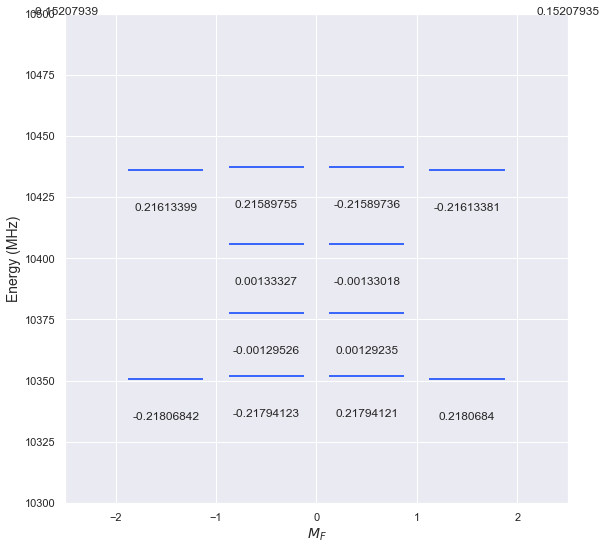

In [52]:
X010.display_PTV(300,1e-3,'MQM',idx=X010.select_q({'G':2}))
plt.ylim(10300,10500)
plt.xlim(-2.5,2.5)

Text(0.5, 1.0, 'CaOH X(010) N=2+,J=3/2 Zeeman Shifts')

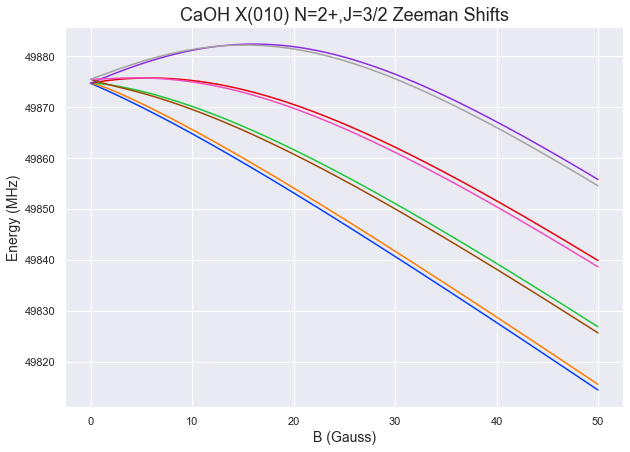

In [243]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':2,'J':1.5},parity='+'))
plt.title('CaOH X(010) N=2+,J=3/2 Zeeman Shifts',fontsize=18)

In [56]:
B0 = 9
E0 = 150
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'N':1,})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
#     print('Case A:')
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    print('Parity=',X010.parities[i])
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

In [282]:
E0=50
B0=1e-4
TDM0 = 1.465*calculate_TDMs(0,N1,N2,E0,B0,[0])
# TDMp = 1.465*calculate_TDMs(1,X010,X010,E0,B0)
# TDMm = 1.465*calculate_TDMs(-1,X010,X010,E0,B0)
# TDMx = -1/np.sqrt(2)*(TDMp - TDMm)

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [283]:
def l2s(inputlist):
      """
      Convert a flatten list to a list of slices:
      test = [0,2,3,4,5,6,12,99,100,101,102,13,14,18,19,20,25]
      list_to_slices(test)
      -> [(0, 0), (2, 6), (12, 14), (18, 20), (25, 25), (99, 102)]
      """
      inputlist.sort()
      pointers = np.where(np.diff(inputlist) > 1)[0]
      pointers = zip(np.r_[0, pointers+1], np.r_[pointers, len(inputlist)-1])
      slices = [(inputlist[i], inputlist[j]+1) for i, j in pointers]
      return slices

In [286]:
N1_all = N1.select_q({'N':1,'F':0},parity='-')
N2_all = N2.select_q({'N':2,'M':0},parity='+')

In [289]:
N2s

(4, 5)

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_20532/4255074159.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)


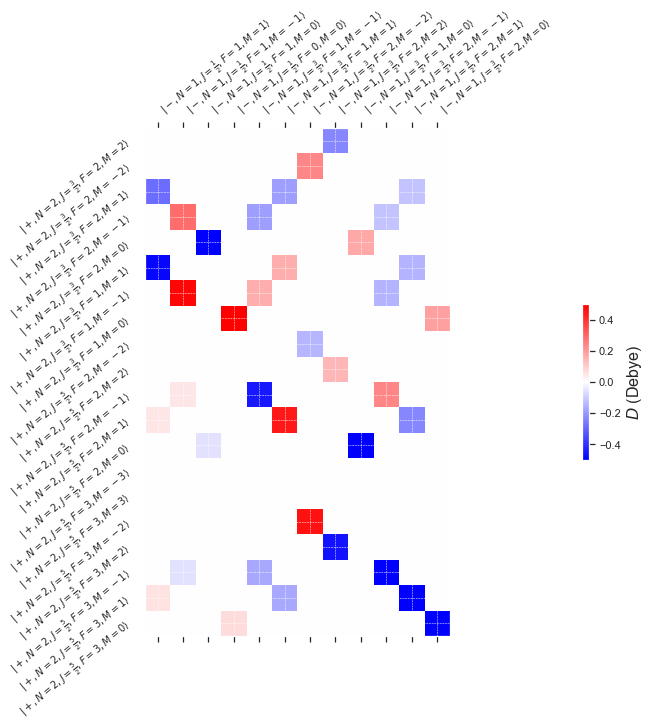

In [290]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = N1.select_q({'N':1},parity='-')
N2_all = N2.select_q({'N':2},parity='+')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1l = np.arange(*N1s)
N2l = np.arange(*N2s)
log=False
BR_plot = TDM0 #convert MHz/V/cm to Debye
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N2s),slice(*N1s)],cmap=plt.get_cmap('bwr'),vmax = 0.5, vmin = -0.5)
y = np.arange(0,len(N2l))
x = np.arange(0,len(N1l))
ax.set_yticks(y)
ax.set_xticks(x)
y_labels = [N2.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N2l]
x_labels = [N1.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N1l]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top-0.5)
cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)
cbar.set_label(label=r'$D$ (Debye)',size=16)
#ax.set_xlim(-0.5,x.size+0.5);

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_3440/1571935017.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')


Text(0.5, 1.0, '$|D|$ (Debye)')

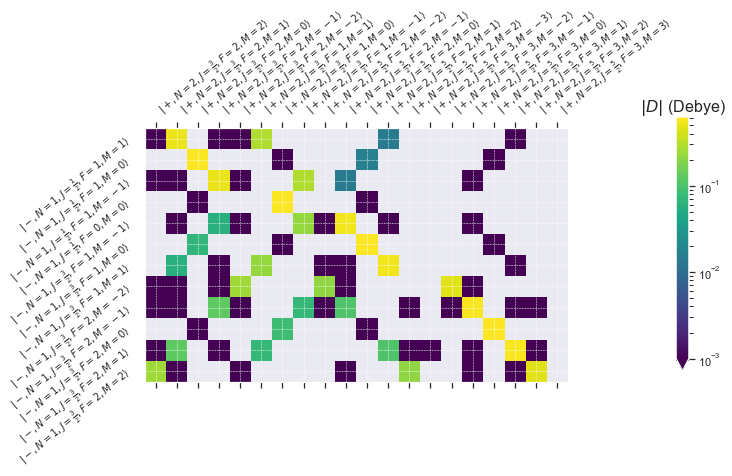

In [18]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = X010.select_q({'N':1},parity='-')
N2_all = X010.select_q({'N':2},parity='+')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1 = np.arange(*N1s)
N2 = np.arange(*N2s)
log=False
BR_plot = abs(TDM0)
BR_plot[BR_plot<1e-8]=0
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N1s),slice(*N2s)],cmap=sns.color_palette("viridis", as_cmap=True),norm=colors.LogNorm(vmin=1e-3))#vmax = vmax, vmin = -3)
x = np.arange(0,len(N2))
y = np.arange(0,len(N1))
ax.set_yticks(y)
ax.set_xticks(x)
x_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N2]
y_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N1]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top)
cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')
cbar.ax.set_title(label=r'$|D|$ (Debye)',size=16,rotation=0)
#ax.set_xlim(-0.5,x.size+0.5);

In [13]:
from tabulate import tabulate

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T[N2]):
    plt.plot(Bz,trace)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Zeeman Shifts, $N=2-$',fontsize=16);
plt.ylim(49865,49885)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N1]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Bz,grad)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Magnetization, $N=2-$',fontsize=16);

AttributeError: 'NoneType' object has no attribute 'T'

<Figure size 720x504 with 0 Axes>

(9900.0, 10090.0)

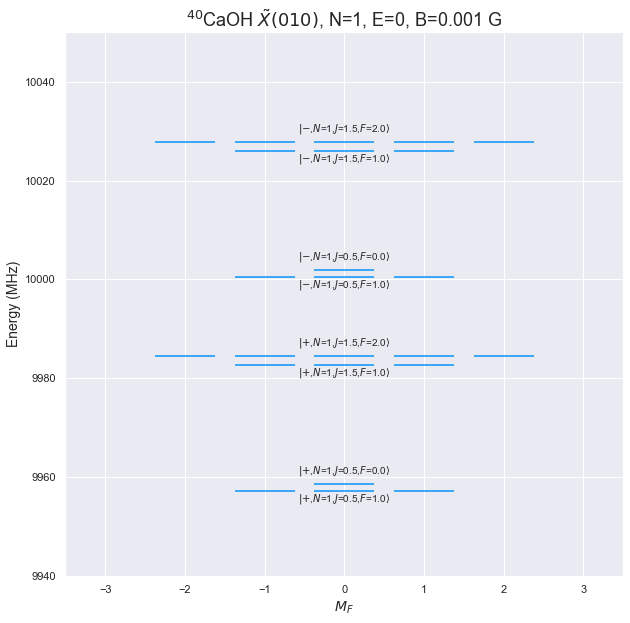

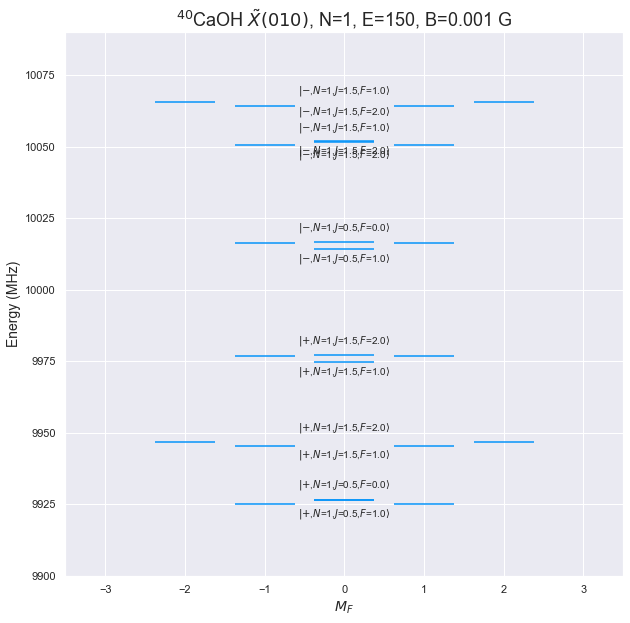

In [57]:
E0=0
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9940,10050)

E0=150
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9900,10090)

# N=2
# X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
# plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)

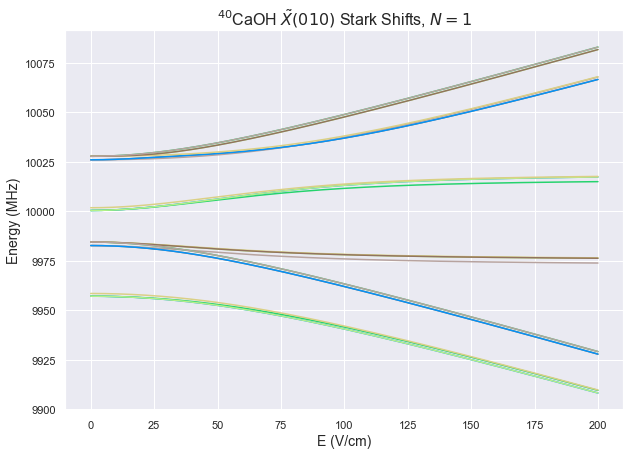

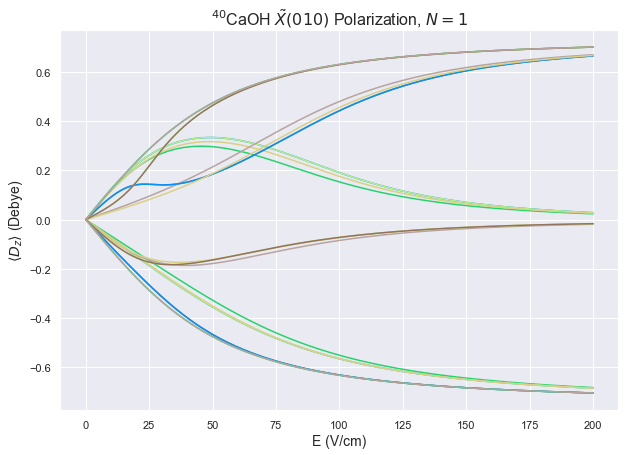

In [133]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

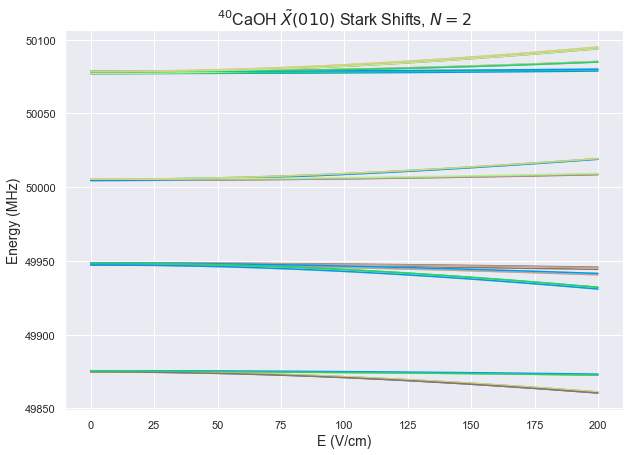

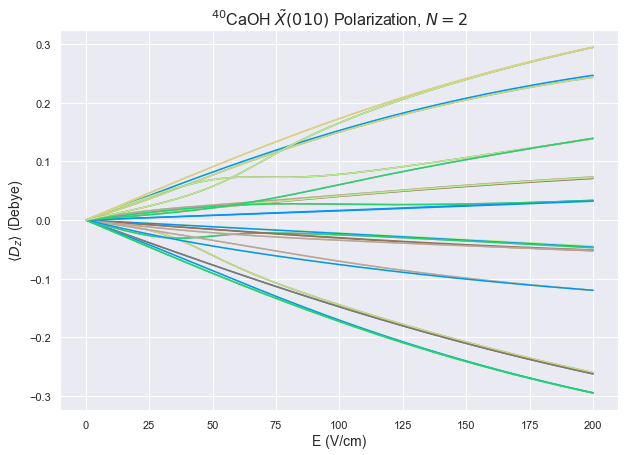

In [134]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2$',fontsize=16);

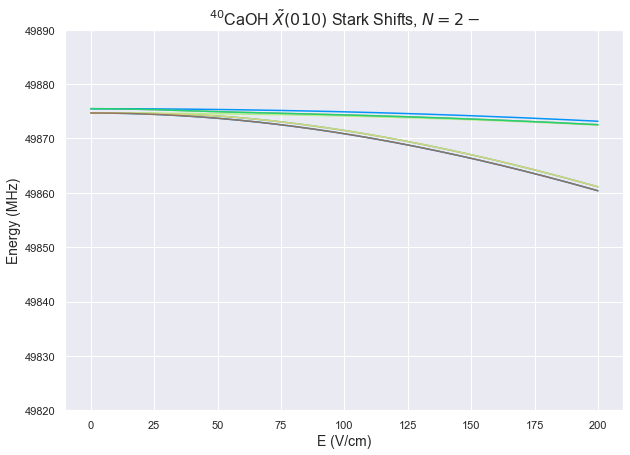

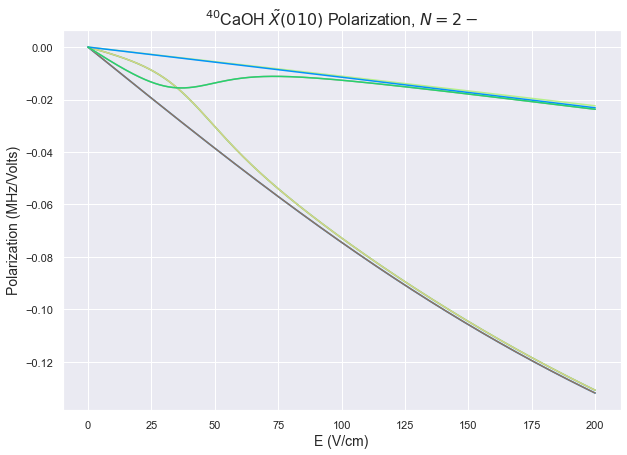

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2-$',fontsize=16);
plt.ylim(49820,49890)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2-$',fontsize=16);

In [36]:
X010.display_levels(0,1e-6,'F',idx=N1_all,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1d',fontsize=18)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2, Free Field')

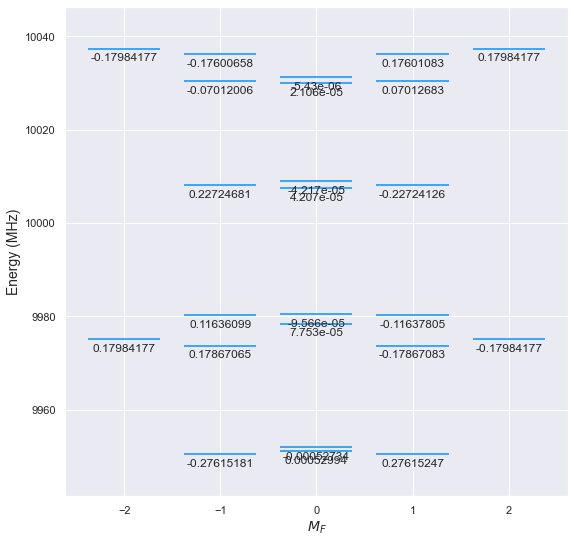

In [130]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8)
X010.display_PTV(60.8,1e-3,'EDM')

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2 60 V/cm, 1e-06 G')

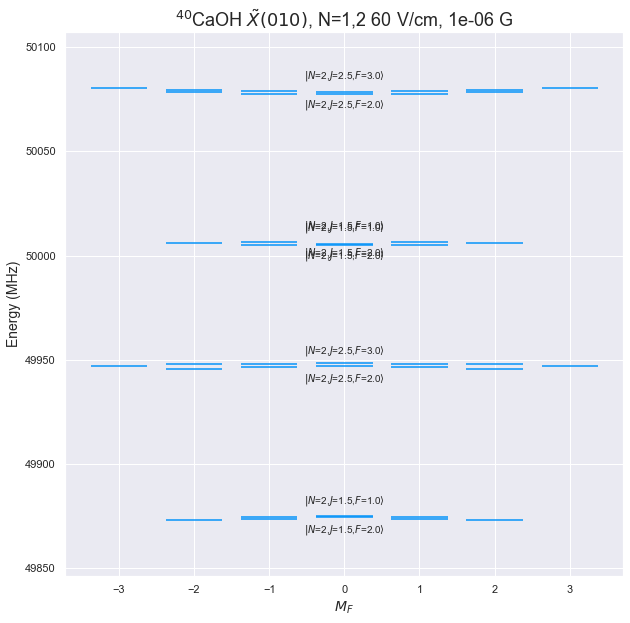

In [14]:
Efield = 60
Bfield = 1e-6
X010.display_levels(Efield,Bfield,'F',idx=N2,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1,2 {} V/cm, {} G'.format(Efield,Bfield),fontsize=18)

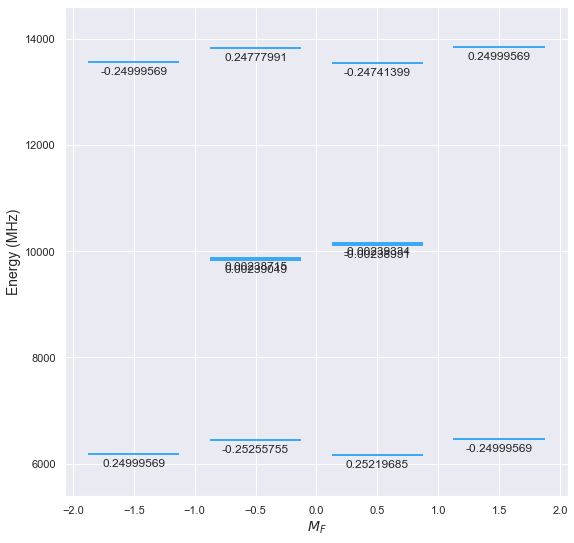

In [41]:
X010.display_PTV(,'EDM')

In [34]:
evals, evecs = X010.eigensystem(Efield,Bfield,order=True,method='torch')
M0_idx = X010.select_q({'M':[-3/2,-1/2,1/2,3/2]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [117]:
evals, evecs = X010.eigensystem(1000,1e-8,order=True,method='torch')
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [42]:
Bz = np.linspace(1e-6,40,1000)
Ez = np.linspace(0,500,1000)

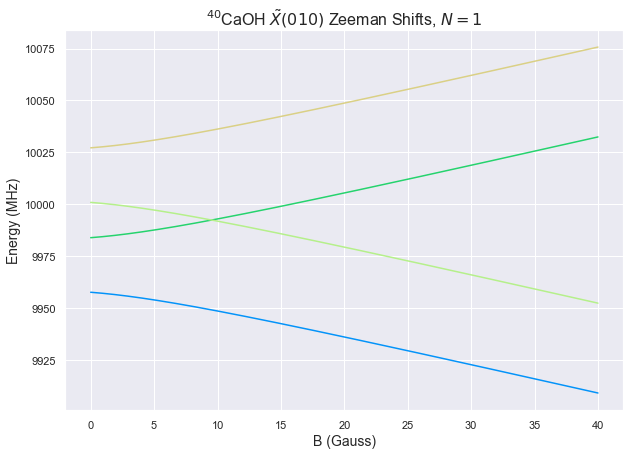

In [75]:
X010.ZeemanMap(Bz,0,plot=True)

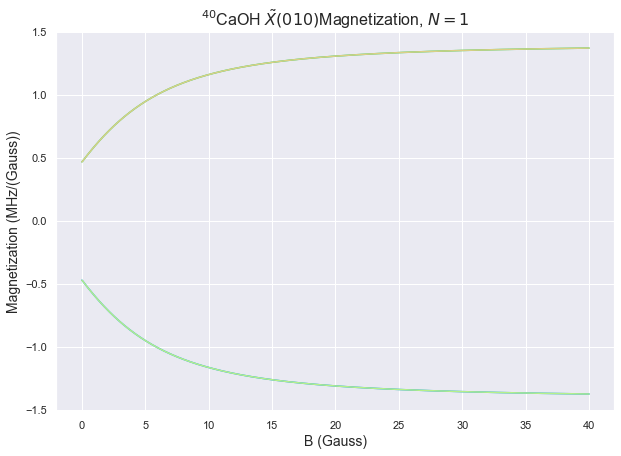

In [76]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T):
    grad = np.gradient(trace)/(Bz[1]-Bz[0])
    plt.plot(Bz,grad)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (MHz/(Gauss))',fontsize=14)
plt.title(X010.state_str + r'Magnetization, $N={}$'.format(*X010.N_range),fontsize=16);

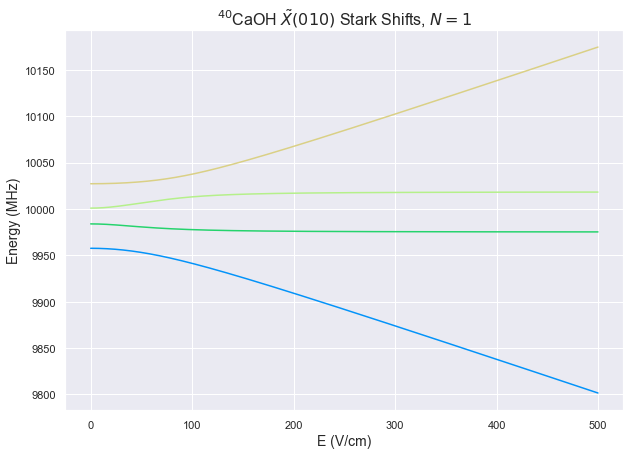

In [78]:
X010.StarkMap(Ez,1e-6,plot=True)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

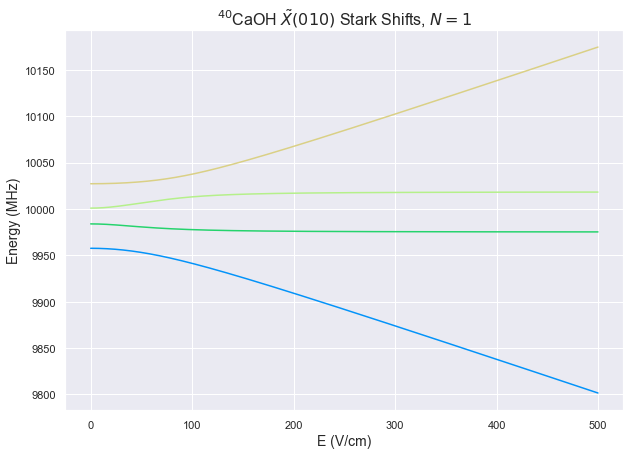

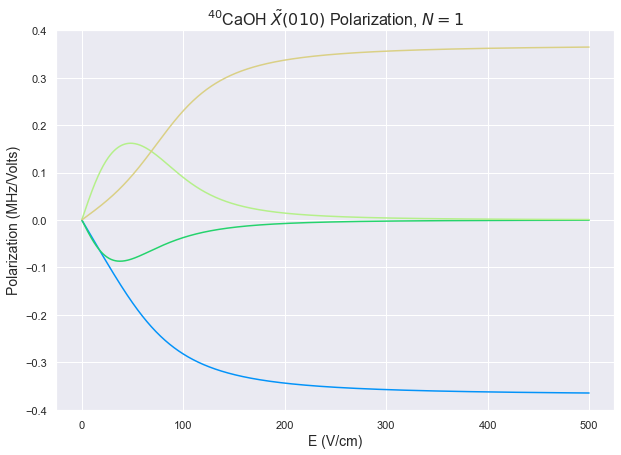

In [98]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

We can display a plot of the energy levels at arbitray field. (The code does not handle parity labeling well, so I am leaving out L for zero field.)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1, 0.5 kV/cm')

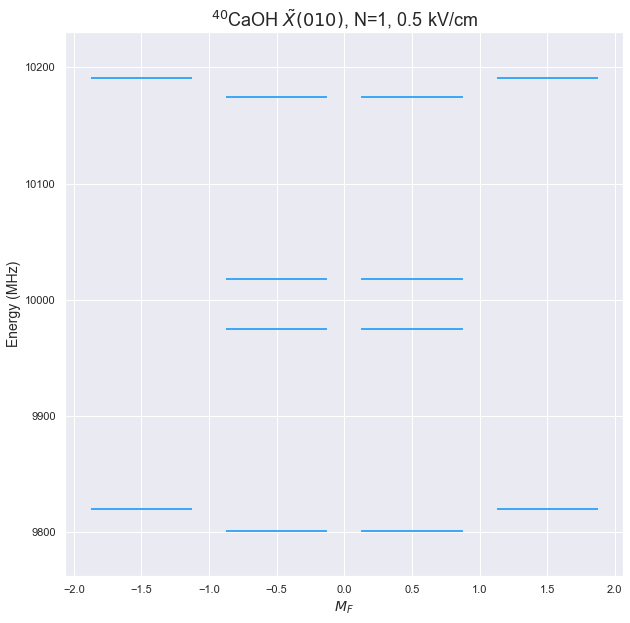

In [47]:
X010.display_levels(500,1e-7,'F',label=None,alt_label=True)
plt.title(X010.state_str+', N=1, 0.5 kV/cm',fontsize=18)

We can also look at PT violating shifts. Here, we consider the EDM shifts as a function of E field. 

In [48]:
X010.eigensystem(0,1e-8);

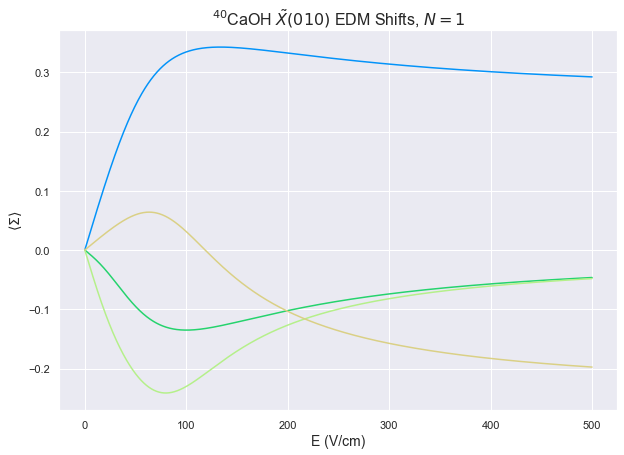

In [85]:
X010.PTV_Map('EDM',E_or_B='E',plot=True)

We can look specifically at the upper and lower Stark manifolds at a given field value too.

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 60.8 V/cm')

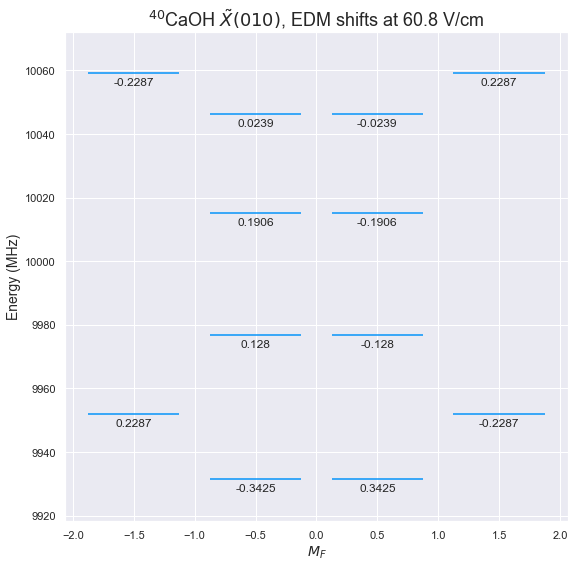

In [51]:
X010.display_PTV(133,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 60.8 V/cm',fontsize=18)

In [60]:
X010.eigensystem(1000,0)
M0_idx = X010.select_q({'M':[1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[0 1 2 3 4 5]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [50]:
X010.eigensystem(100,1e-2)
(sy.Matrix(X010.evecs0[0]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[0]))[0]

-0.048487643331535*Bz - 0.277154404334809*Ez + 9969.35364112334

In [43]:
(sy.Matrix(X010.evecs0[1]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[1]))[0]

1.28069264538709*Bz - 0.368490639112473*Ez + 9987.63731699745

In [20]:
import matrix_elements_sym as me
from functools import partial
from matrix_elements_sym import decouple_b_even

def H_even_X(q_numbers,params,matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    if symbolic:
        Ez,Bz = sy.symbols('E_z B_z')
        size = len(q_numbers[q_str[0]])
        # Need to construct empty matrices to fill with matrix elements
        # Sympy does not like numpy arrays, so convert to list
        H0 = np.zeros((size,size)).tolist()
        V_B = np.zeros((size,size)).tolist()
        V_E = np.zeros((size,size)).tolist()
        #Iz = np.zeros((size,size)).tolist()
        #Sz = np.zeros((size,size)).tolist()
        for i in range(size):
            for j in range(size):
                # State out is LHS of bra ket, state in is RHS
                state_out = {q+'0':q_numbers[q][i] for q in q_str}
                state_in = {q+'1':q_numbers[q][j] for q in q_str}
                q_args = {**state_out,**state_in}
                elements = {term: sy.nsimplify(element(**q_args)) for term, element in matrix_elements.items()}
                # The Hamiltonian
                H0[i][j] = params['Be']*elements['N^2'] + params['Gamma_SR']*elements['N.S'] + \
                    params['bF']*elements['I.S'] + params['c']/3*sy.sqrt(6)*elements['T2_0(I,S)']
                if params.get('q_lD') is not None:
                    H0[i][j] += params['q_lD']/2*elements['l-doubling'] - params['Gamma_SR']*elements['NzSz']+params['Gamma_Prime']*elements['NzSz']
                if M_values!='none':
                    V_B[i][j]+=params['g_S']*params['mu_B']*elements['ZeemanZ']
                    V_E[i][j]+=-params['muE']*elements['StarkZ']
                # H[i][j] = round(H[i][j],precision)
                #Iz[i][j] = params['c']*elements['Iz']
                #Sz[i][j] = elements['Sz']
        # Need to construct IzSz term and add to Hamiltonian
        #H=matadd(H,matmult(Iz,Sz))
        # Create symbolic object
        H_symbolic = sy.Matrix(H0)+Ez*sy.Matrix(V_E)+Bz*sy.Matrix(V_B)
#         H0_num = np.array(H0).astype(np.float64)
#         V_E_num = np.array(V_E).astype(np.float64)
#         V_B_num = np.array(V_B).astype(np.float64)
        # Use symbolic object to create function that given E and B values, returns a numpy array
#         H_func = lambda E,B: H0_num + V_E_num*E + V_B_num*B
        # H_func = sy.lambdify((Ez,Bz), H_symbolic, modules='numpy')
        return H_symbolic

def decouple_b(input_qnumbers,output_qnumbers,S=1/2,I=1/2):
    input_keys = list(input_qnumbers)
    output_keys = list(output_qnumbers)
    input_size = len(input_qnumbers[input_keys[0]])
    output_size = len(output_qnumbers[output_keys[0]])
    basis_matrix = np.zeros((output_size,input_size)).tolist()
    for i in range(output_size):
        for j in range(input_size):
            decoupled_qnumbers = {q:output_qnumbers[q][i] for q in output_keys}
            b_qnumbers = {q:input_qnumbers[q][j] for q in input_keys}
            basis_matrix[i][j] = sy.nsimplify(decouple_b_even(decoupled_qnumbers,b_qnumbers,S=S,I=I))
    return basis_matrix
   
    

bBJ_even_X_matrix_elements={
        # Fine Structure
        'N^2': me.Rot_bBJ,                 # N^2 Rotation
        'N.S': me.SR_bBJ,                  # N.S Spin Rotation
        'l-doubling': me.lD_bBJ,           # Effective l doubling
        'NzSz': me.NzSz_bBJ,               # NzSz for bending mode

        # Hydrogen Hyperfine
        'I.S': me.IS_bBJ,                  # I.S Fermi Contact Interaction
        'T2_0(I,S)': me.T2IS_bBJ,          # I S dipolar interaction
        'Iz': me.Iz_bBJ,                   # I.n projection of I on internuclear axis n
        'Sz': me.Sz_bBJ,                   # S.n projection of S on internuclear axis n
        }

ext_fields = {
# External Fields
'ZeemanZ': me.ZeemanZ_bBJ,         # Zeeman interaction with lab z magnetic field
'StarkZ': me.StarkZ_bBJ            # Stark interaction with lab z electric field
}
bBJ_even_X_matrix_elements.update(ext_fields)
for term,element in bBJ_even_X_matrix_elements.items():       #iterate through, substitute hydrogen proton value
            bBJ_even_X_matrix_elements[term] = partial(element,I=1/2)

        

B,gamma,gammap, bF,c,b,q_lD,muE,muB,g_S,g_L = sy.symbols('B_{rot} gamma gamma^\' b_F c b q_{lD} D mu_B g_S g_L')
params_40X010 = {
'Be': B,
'Gamma_SR': gamma,
'Gamma_Prime': gammap,
'bF': 0,
'c': 0,
'b': b,
'q_lD': q_lD,
'muE': muE,
'mu_B': muB, #MHz/Gauss
'g_S': g_S,
'g_L': g_L,
}

def build_operator(q_numbers,parameter,operator_element,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    size = len(q_numbers[q_str[0]])
    # Need to construct empty matrices to fill with matrix elements
    # Sympy does not like numpy arrays, so convert to list
    H0 = np.zeros((size,size)).tolist()
    #Iz = np.zeros((size,size)).tolist()
    #Sz = np.zeros((size,size)).tolist()
    for i in range(size):
        for j in range(size):
            # State out is LHS of bra ket, state in is RHS
            state_out = {q+'0':q_numbers[q][i] for q in q_str}
            state_in = {q+'1':q_numbers[q][j] for q in q_str}
            q_args = {**state_out,**state_in}
            operator = sy.nsimplify(operator_element(**q_args))
            H0[i][j]+= parameter*operator
    H_symbolic = sy.Matrix(H0)
    return H_symbolic

In [21]:
H_sym = H_even_X(X010.q_numbers,params_40X010,bBJ_even_X_matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=8)

In [22]:
(H_sym)

Matrix([
[            B_{rot} - gamma/2 - gamma^'/2,                                   -q_{lD},                                                        0,                                                        0,                 -B_z*g_S*mu_B/6 + D*E_z/3,                                         0,                                                         0,                                                         0,                                                               0,                                                               0, -sqrt(2)*B_z*g_S*mu_B/3 + sqrt(2)*D*E_z/6,                                         0,                                                              0,                                                              0,                                                         0,                                                         0,                                                         0,                                                         0,     

In [23]:
NzSz = build_operator(X010.q_numbers,params_40X010['Gamma_Prime'],bBJ_even_X_matrix_elements['NzSz'],precision=8)
NS = build_operator(X010.q_numbers,params_40X010['Gamma_SR'],bBJ_even_X_matrix_elements['N.S'],precision=8)

In [24]:
NS-NzSz

Matrix([
[-gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0],
[                 0, -gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                  

In [25]:
inputt = X010.q_numbers
output = X010.alt_q_numbers['decoupled']
basis_matrix = sy.Matrix(decouple_b(inputt,output,I=1/2))

In [26]:
H_dcpl = basis_matrix*H_sym*basis_matrix.T

In [27]:
NzSz_dcpl = basis_matrix*NzSz*basis_matrix.T
NS_dcpl = basis_matrix*NS*basis_matrix.T

In [28]:
SR_dcpl = NS_dcpl-NzSz_dcpl

In [29]:
SR_dcpl

Matrix([
[gamma/2 - gamma^'/4,                   0,                   0,                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                   0,                   0,                   0,                   0],
[                  0, gamma/2 - gamma^'/4,                   0,                   0,                                   0,                                   0,                                   0,                                  

In [24]:
ilist = range(0,24)
for i in ilist:
    print(i)
    for k,v in X010.alt_q_numbers['decoupled'].items():
        print('{} = {}'.format(k,v[i]))

0
K = -1
N = 1
M_N = -1
M_S = -0.5
M_I = 0
M_F = -1.5
1
K = 1
N = 1
M_N = -1
M_S = -0.5
M_I = 0
M_F = -1.5
2
K = -1
N = 1
M_N = -1
M_S = 0.5
M_I = 0
M_F = -0.5
3
K = 1
N = 1
M_N = -1
M_S = 0.5
M_I = 0
M_F = -0.5
4
K = -1
N = 1
M_N = 0
M_S = -0.5
M_I = 0
M_F = -0.5
5
K = 1
N = 1
M_N = 0
M_S = -0.5
M_I = 0
M_F = -0.5
6
K = -1
N = 1
M_N = 0
M_S = 0.5
M_I = 0
M_F = 0.5
7
K = 1
N = 1
M_N = 0
M_S = 0.5
M_I = 0
M_F = 0.5
8
K = -1
N = 1
M_N = 1
M_S = -0.5
M_I = 0
M_F = 0.5
9
K = 1
N = 1
M_N = 1
M_S = -0.5
M_I = 0
M_F = 0.5
10
K = -1
N = 1
M_N = 1
M_S = 0.5
M_I = 0
M_F = 1.5
11
K = 1
N = 1
M_N = 1
M_S = 0.5
M_I = 0
M_F = 1.5
12


IndexError: list index out of range

In [25]:
vec = np.zeros(24)
vec[6] = 1/sy.sqrt(2) #
vec[17] = 1/sy.sqrt(2)

In [26]:
NS_dcpl-NzSz_dcpl

Matrix([
[gamma/4,       0,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0, gamma/4,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,       0,       0],
[      0,       0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0, sqrt(2)*gamma/4,               0,               0,               0,               0, 

In [27]:
H_dcpl=sy.simplify(H_dcpl)
H_dcpl

Matrix([
[-B_z*g_S*mu_B/2 + B_{rot} - D*E_z/2 + gamma/4,                                       -q_{lD},                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                                      -q_{lD}, -B_z*g_S*mu_B/2 + B_{rot} + D*E_z/2 + gamma/4,                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                              

In [135]:
X010.eigensystem(1000,0)
even = sy.Matrix([0,1/sy.sqrt(2),0,0,0,0,1/sy.sqrt(2),0])
odd = sy.Matrix([1/sy.sqrt(2),0,0,0,0,0,0,-1/sy.sqrt(2)])
x = sy.simplify(even.T*H_dcpl*even)
y = sy.simplify(odd.T*H_dcpl*odd)
x[0]

B_{rot} + D*E_z/2 + b_F/4 + c/60 - gamma/4

B_{rot} - D*E_z/2 + b_F/4 + c/60 - gamma/4

In [142]:
X010.eigensystem(1000,)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[1]).T*H_sym*sy.Matrix(X010.evecs0[1])
sy.N(x-y)[0]

-1.09823410572936e-11*B_z*g_S*mu_B + 3.74903172901661e-5*D*E_z - 0.00019018948895402*b_F - 0.0122648086400407*c - 5.8647193332706e-5*gamma + 0.00118230125639449*q_{lD}

In [42]:
X010.H_symbolic

Matrix([
[                           9980.21896666667,                                      21.649,         -0.4670780207227*Bz + 0.24583286*Ez,                                           0, -1.32109614318485*Bz + 0.173830082344483*Ez,                                           0,                                           0,                                           0],
[                                     21.649,                            9980.21896666667,                                           0,         -0.4670780207227*Bz - 0.24583286*Ez,                                           0, -1.32109614318485*Bz - 0.173830082344483*Ez,                                           0,                                           0],
[        -0.4670780207227*Bz + 0.24583286*Ez,                                           0,                            9978.89541111111,                                      21.649,                            1.14594510633293,                                          

In [17]:
X010.eigensystem(100000,0)
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
for i in M0_idx:
    print('E =',X010.evals0[i])
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'])))
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','Sigma','P','M'])))
#     display(Latex(X010.gen_state_str(i,thresh=0.05)))

[0 1 2 3 4 5 6 7]
E = -26869.87053477218


<IPython.core.display.Latex object>

E = -26869.753213628093


<IPython.core.display.Latex object>

E = 9973.151313958582


<IPython.core.display.Latex object>

E = 10016.449292801037


<IPython.core.display.Latex object>

E = 10042.423225935365


<IPython.core.display.Latex object>

E = 10085.720997939427


<IPython.core.display.Latex object>

E = 46880.36769489169


<IPython.core.display.Latex object>

E = 46880.485222874166


<IPython.core.display.Latex object>

In [83]:
X010.eigensystem(0,1e-6)
X010.g_eff_Map(step=1e-6);

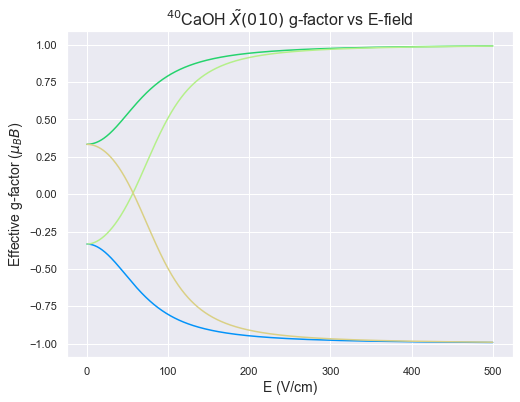

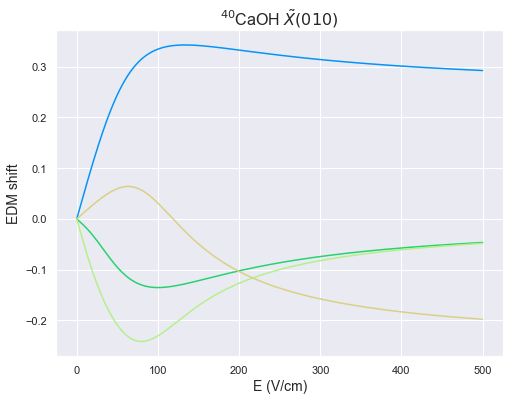

In [86]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

In [81]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[1/2]})
print(M_idx)

[0 1 2 3]


IndexError: index 4 is out of bounds for axis 0 with size 4

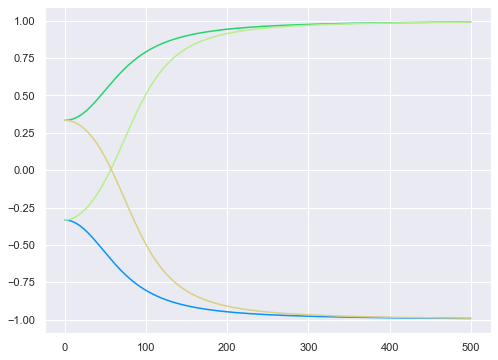

In [87]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(10):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.xlim(53,73)
plt.figure(figsize=(8,6))
for i in range(12):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);
plt.xlim(53,73);

In [175]:
for j in [12,18]:
    g_eff = X010.g_eff_E.T[j]
    for i in range(1,len(g_eff)):
        if (g_eff[i]>0 and g_eff[i-1]<0) or g_eff[i]<0 and g_eff[i-1]>0:
            print('idx =',j)
            print('E field =',(Ez[i]+Ez[i-1])/2)
            print('PTV =,',(X010.PTV_E.T[j][i]+X010.PTV_E.T[j][i-1])/2)
            print('Energy =',(X010.evals_E.T[j][i]+X010.evals_E.T[j][i-1])/2)

idx = 12
E field = 60.83108310831083
PTV =, -0.22727988
Energy = 10008.053070099853
idx = 18
E field = 65.28152815281528
PTV =, 0.070567485
Energy = 10030.921999206803


In [196]:
X010.eigensystem(1000,1e-7)
M_idx = X010.select_q({'M':[0]})
idx = M_idx
for i in idx:
    print(idx)
    print(X010.g_eff_EB()[i])
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]
3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
7.797760376487909e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 65.28 V/cm')

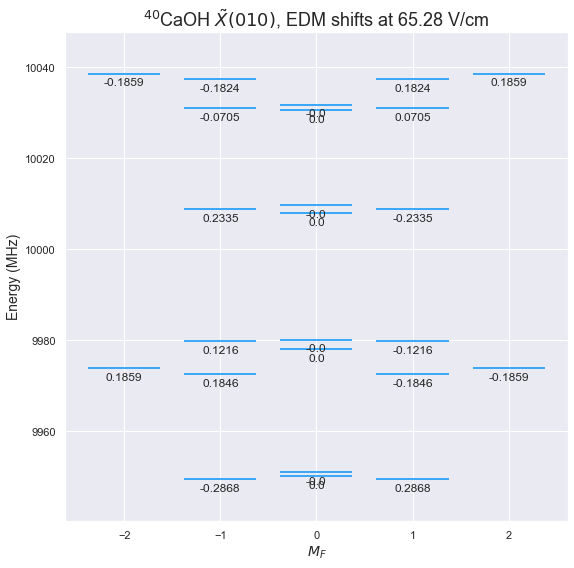

In [179]:
X010.display_PTV(65.28,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 65.28 V/cm',fontsize=18)

[ 1  3  5  9 13 15 17 21]
1 1.45e-05 499.7999799979998
3 1.45e-05 499.74997499749975
5 1.3e-07 105.06050605060506
9 1.3e-07 90.65906590659066
13 1.6e-07 105.71057105710571
15 1.8e-07 106.66066606660665
17 1.149e-05 499.8999899989999
21 1.149e-05 499.84998499849985


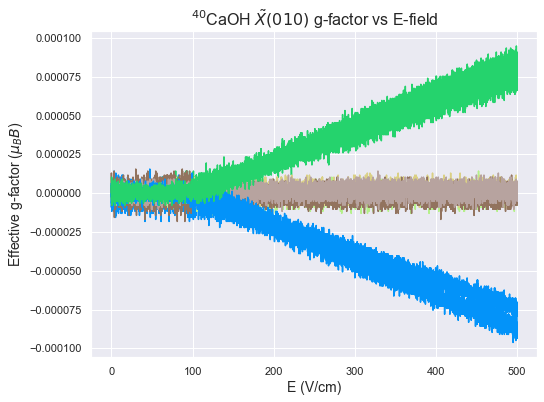

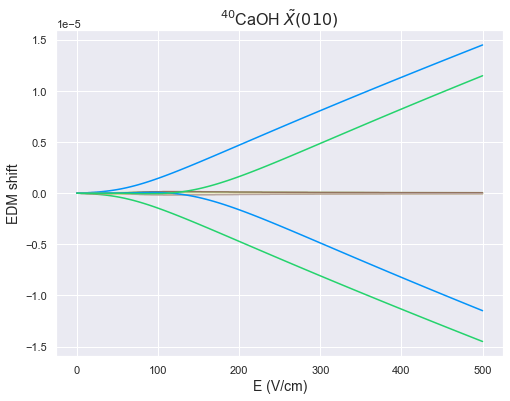

In [192]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[0]})
print(M_idx)

j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
    print(i,max(abs(X010.PTV_E.T[i])),Ez[np.argmax(abs(X010.PTV_E.T[i]))])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 1000 V/cm and 10 mG')

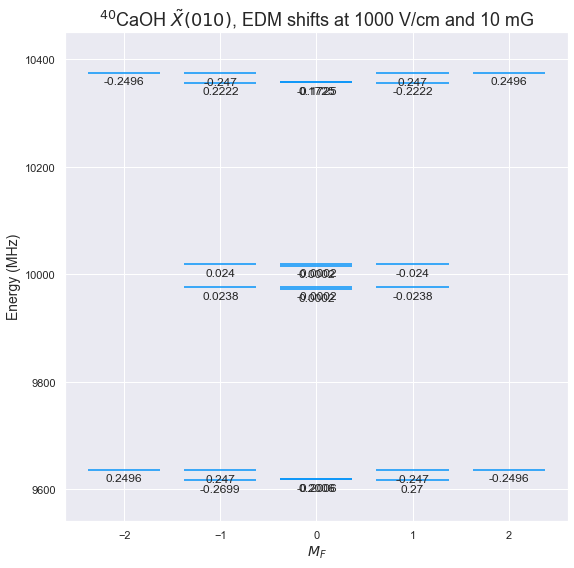

In [199]:
X010.display_PTV(1000,1e-2,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 1000 V/cm and 10 mG',fontsize=18)

In [105]:
import time
X010_p = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=8,M_range=[1])

Bz = np.linspace(1e-6,20,1000)
Ez = np.linspace(0,500,1000)
t0 = time.perf_counter()
Bslices_p = X010_p.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B',output=True,EDM_or_MQM='EDM')
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

25.03476210000008 sec


In [49]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [50]:
# save_json_data(Bslices[0].tolist(),'X010_CaOH_Mpm0p5_EB_grid_evals_20220306')
# save_json_data(Bslices[1].tolist(),'X010_CaOH_Mpm0p5_EB_grid_PTV_20220306')

In [106]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


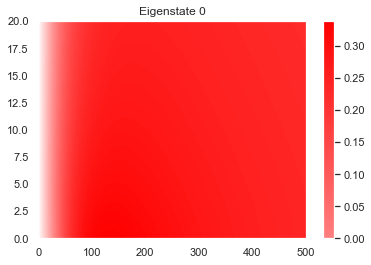

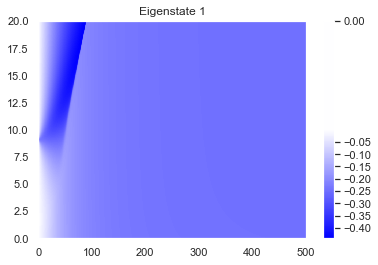

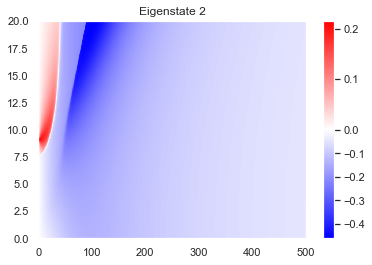

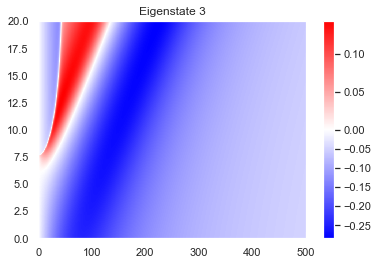

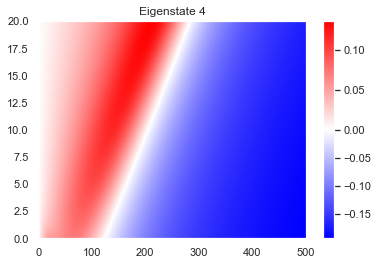

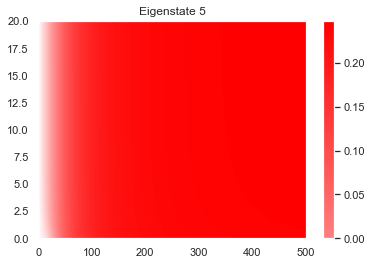

In [107]:
from matplotlib.colors import TwoSlopeNorm
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.pcolormesh(*mesh,Bslices_p[1][i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


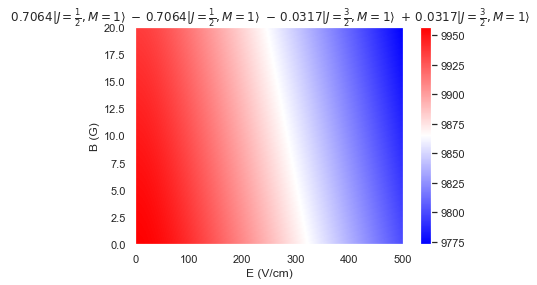

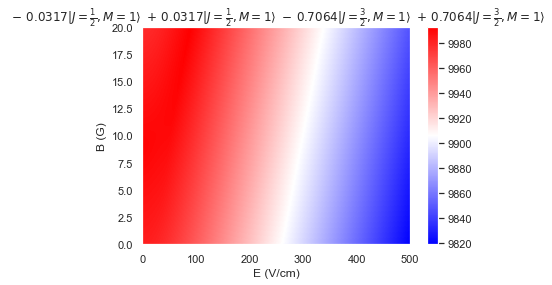

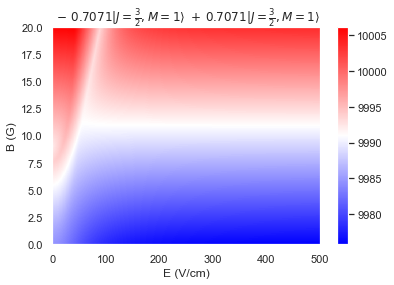

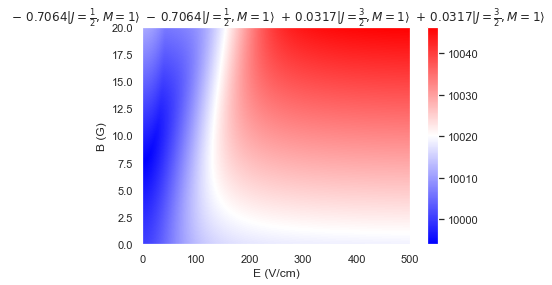

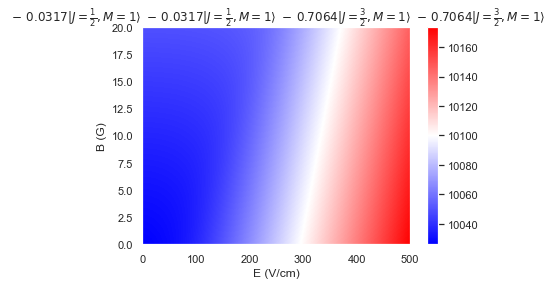

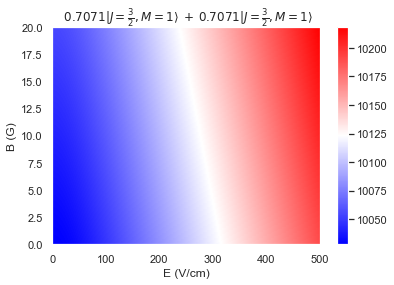

In [108]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,Bslices_p[0][i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [73]:
np.gradient(Bslices_p[0][0])[1]/(Bz[1]-Bz[0])

array([[-5355728.85423, -2678181.5899 , -1339206.26323, ...,
           -7655.38735,    -7654.93535,    -7654.7095 ],
       [-5355531.53913, -2678082.64793, -1339156.52261, ...,
           -7655.38253,    -7654.93054,    -7654.70469],
       [-5354934.98431, -2677784.10418, -1339007.56767, ...,
           -7655.36806,    -7654.91609,    -7654.69025],
       ...,
       [  -30677.45953,   -17459.08086,   -10543.94911, ...,
           -7165.79655,    -7165.78812,    -7165.7839 ],
       [  -30660.62245,   -17451.45616,   -10540.68135, ...,
           -7165.76865,    -7165.76022,    -7165.75601],
       [  -30643.80722,   -17443.84186,   -10537.41838, ...,
           -7165.74078,    -7165.73236,    -7165.72816]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


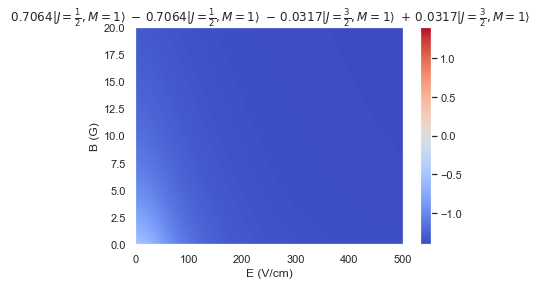

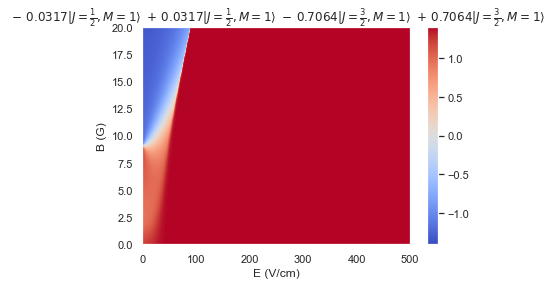

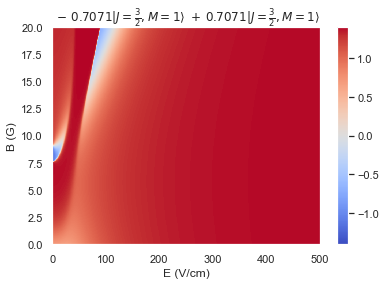

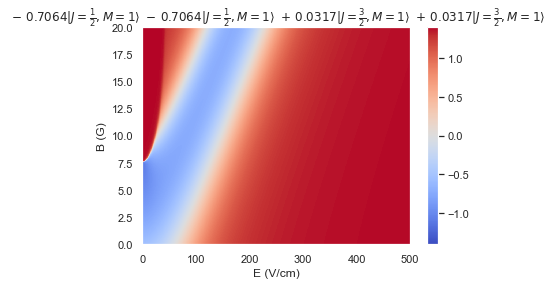

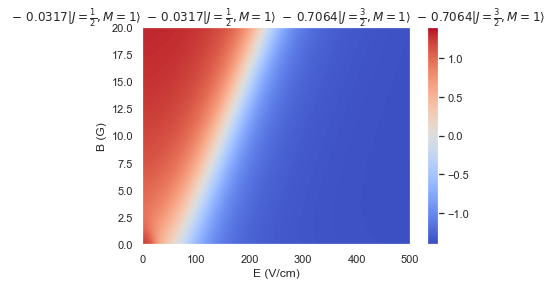

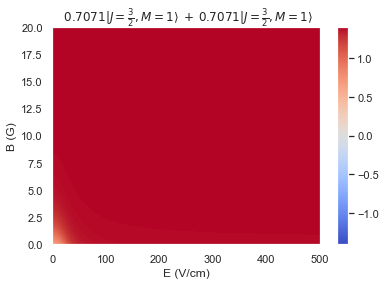

In [109]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,geff,shading='auto',cmap='coolwarm',vmin=-1.4,vmax=1.4)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [97]:
np.log10(-0.01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


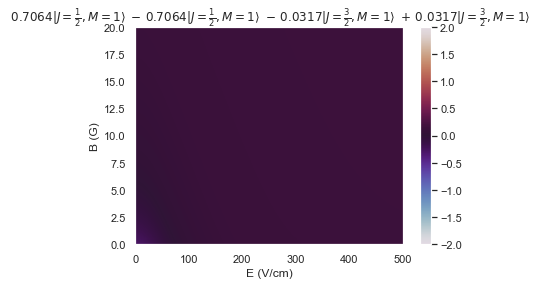

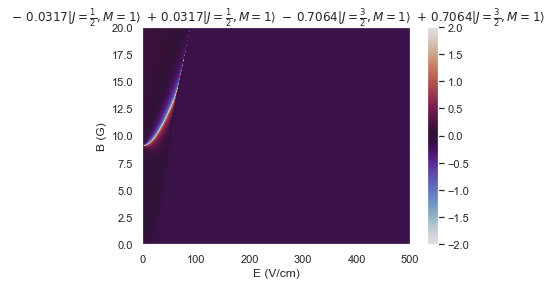

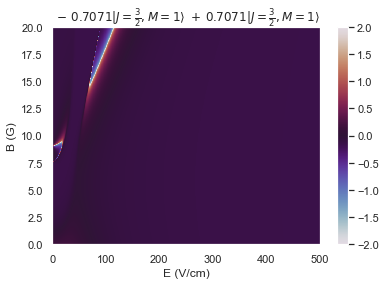

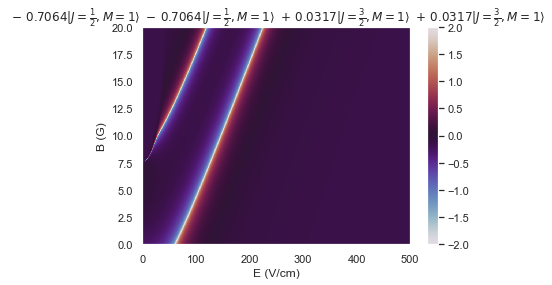

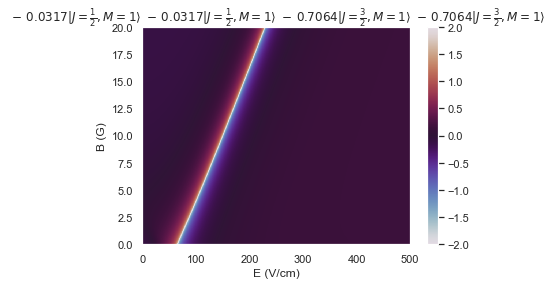

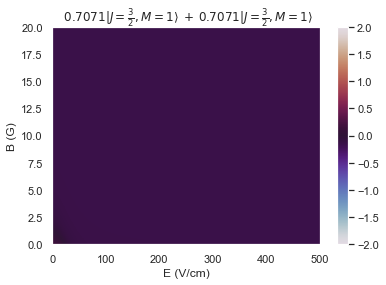

In [110]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,-np.sign(geff)*np.log10(abs(geff)),shading='auto',cmap='twilight',vmin=-2,vmax=2)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')